In [ ]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from datetime import datetime
from collections import Counter

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.2)

rcParams['figure.figsize'] = 16,6

In [2]:
df = pd.read_csv('WATER_FINAL.csv', low_memory = False)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [5]:
# #Select by station from the original dataset 
# df = df.loc[df['Station'].isin(['CB5.1', 'CB4.4', 'CB5.2', 'TRQ0088', 'ET5.2', 'TRQ0146', 'ET6.2',
#        'EE3.0', 'CCM0069', 'CB4.3C', 'EE2.2', 'EE2.1', 'CB4.3E',
#        'TRQ0224', 'TRQ0203', 'XEF3551', 'XGG8251', 'CB4.1C', 'CB3.3C', 'XHH3851', 'ET4.1', 'TUK0181',
#        'ET4.2', 'CB3.3E', 'CB4.1E', 'XHH4916', 'XHH4931', 'XHH4742',
#        'COR0056', 'XHH4528', 'CB7.1S', 'CB5.4', 'CB5.3', 'CB7.1', 'EE3.5', 'CB7.1N', 'EE3.4',
#                                 'CB7.2E', 'CB7.3E', 'CB7.2', 'CB7.4N', 'CB7.3', 'LE2.3', 'RET1.1', 'LE1.2', 'LE2.2', 'LE1.3', 'LE1.4', 'CB5.1W',
#        'XBF7904', 'XBF2099', 'XBF7495', 'XBG4203', 'LE3.6', 'CB6.1', 'LE3.4', 'LE3.3', 'LE3.2', 'IND000.02',
#        'DYM000.93', 'ANT000.44', 'CHE056.54', 'WE4.2', 'CB6.4', 'LE4.2', 'LE4.3', 'POQ001.36', 'CHE019.38', 
#                                 'YRK000.79', 'PXT0809', 'ANA0082', 'ANA30', 'TF1.6', 'TF1.7', 'TF1.0', 'WXT0001' 'TF1.4',
#                                 'TF1.3', 'TF1.2', 'PIS0033', 'WXT0013', 'TF2.1', 'XFB1986', 'MTI0015', 'PMS51', 
#                                 'XFB7379', 'MAT0078', 'RET2.4', 'MAT0016', 'RET2.2', 'RET2.1', 'TF2.4', 'TF2.3', 'TF2.2',
#                                 '1AQUA000.43', 'XEA3687', 'XEB5404', 'XDA8236', 'CB5.5', 'CB5.4W', 'DIV000.41', 'INN002.24', 'MIL000.93', 'CHE061.94',
#                                 'CHE055.63', 'GWR007.7', 'COC001.57', 'GWR003.54', 'CHE063.58', 'LIS003.84', 'INN001.43', 'LIS001.23'])]


In [6]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [7]:
#Collection date period of Water quality is from 1992 November 1st to July 8th 2020
df = df.sort_values('Date', ascending = True)

In [8]:
#Collect dates up to a certain point
mask = (df['Date'] > '2009-12-31')
df1 = df.loc[mask]

In [9]:
#now drop all values where the measure is nan
df1['MeasureValue'] = df1['MeasureValue'].replace(np.nan, 'nan')
df2 = df1[df1['MeasureValue'] != 'nan']

C:\Users\jvhua\Miniconda3\envs\tensflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jvhua\Miniconda3\envs\tensflow\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [10]:
df2

,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
41860,NaN,NaN,NaN,NaN,NaN,CMC,2010-01-01,NaN,NaN,NaN,NaN,MSWA,NaN,NaN,40.047160,NaN,-77.520710,NaN,7.4000,NaN,2018-09-03T14:59:25.947,NaN,NaN,NO3N.1,Not in CBP Database,Nitrate-nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,1.0,NaN,NaN,NaN,NaN,NaN,MSWA.S1,S1,NaN,NaN,NaN,1.0,14:15:00,NaN,mg/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.52070999999999 40.04716),20503050302,Middle Spring Creek,42041,Cumberland County,PA
167202,NaN,NaN,NaN,NaN,NaN,CMC,2010-01-01,NaN,NaN,NaN,NaN,MSWA,NaN,NaN,40.047160,NaN,-77.520710,NaN,60.0000,NaN,2018-09-03T14:59:25.947,NaN,NaN,WC.4,TURBIDITY TUBE,Water Clarity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,1.0,NaN,NaN,NaN,NaN,NaN,MSWA.S1,S1,NaN,NaN,NaN,1.0,14:15:00,NaN,cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.52070999999999 40.04716),20503050302,Middle Spring Creek,42041,Cumberland County,PA
124497,NaN,NaN,NaN,NaN,NaN,CMC,2010-01-01,NaN,NaN,NaN,NaN,MSWA,NaN,NaN,40.047160,NaN,-77.520710,NaN,100.0000,NaN,2018-09-03T14:59:25.947,NaN,NaN,CO.1,SPECIFIC CONDUCTIVITY,Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,1.0,NaN,NaN,NaN,NaN,NaN,MSWA.S1,S1,NaN,NaN,NaN,2.0,14:15:00,NaN,uS/cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.52070999999999 40.04716),20503050302,Middle Spring Creek,42041,Cumberland County,PA
193041,NaN,NaN,NaN,NaN,NaN,CMC,2010-01-01,NaN,NaN,NaN,NaN,MSWA,NaN,NaN,40.047160,NaN,-77.520710,NaN,6.6672,NaN,2018-09-03T14:59:25.947,NaN,NaN,WT.6,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,1.0,NaN,NaN,NaN,NaN,NaN,MSWA.S1,S1,NaN,NaN,NaN,1.0,14:15:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.52070999999999 40.04716),20503050302,Middle Spring Creek,42041,Cumberland County,PA
20301,NaN,NaN,NaN,NaN,NaN,CMC,2010-01-01,NaN,NaN,NaN,NaN,MSWA,NaN,NaN,40.047160,NaN,-77.520710,NaN,0.0400,NaN,2018-09-03T14:59:25.947,NaN,NaN,OP.1,Not in CBP Database,Orthophosphate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,1.0,NaN,NaN,NaN,NaN,NaN,MSWA.S1,S1,NaN,NaN,NaN,1.0,14:15:00,NaN,mg/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-77.52070999999999 40.04716),20503050302,Middle Spring Creek,42041,Cumberland County,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22151,NaN,NaN,NaN,NaN,NaN,CMC,2020-07-08,NaN,NaN,NaN,NaN,PRK,NaN,NaN,38.469117,NaN,-77.263728,NaN,29.0000,NaN,2020-07-09T18:45:09.217,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.7,0.30,1.0,NaN,NaN,NaN,NaN,NaN,PRK.PR-11,PR-11 Mallows Bay Dock,NaN,Incoming (Flood),NaN,2.0,09:00:00,NaN,deg C,NaN,Normal,green,NaN,NaN,Calm,NaN,NaN,Sunny,NaN,NaN,NaN,MD,POINT (-77.263728 38.4691169),20700110106,Tank Creek-Potomac River,24017,Charles County,MD
22152,NaN,NaN,NaN,NaN,NaN,CMC,2020-07-08,NaN,NaN,NaN,NaN,PRK,NaN,NaN,38.459693,NaN,-77.269464,NaN,29.0000,NaN,2020-07-09T18:47:46.363,debris,N

In [11]:
columns = df2.columns
for col in columns:
    print(col,df2[col].nunique())

Agency 7
BiasPC 1
CloudCover 11
Comments 7156
Cruise 265
Database 2
Date 3657
FieldActivityEventType 5
FieldActivityRemark 0
FlowStage 0
GaugeHeight 1153
GroupCode 62
HUC12 294
Lab 13
Latitude 2166
Layer 10
Longitude 2169
LowerPycnocline 68
MeasureValue 43395
Method 23
ModifiedDate 35136
Other Comments 1848
Other Conditions 11
Parameter 122
ParameterName_CBP 24
ParameterName_CMC 26
PrecipType 7
PrecisionPC 0
Pressure 93
Problem 32
Program 3
Project 6
Qualifier 3
Rainfall 726
Rainfall Within 24 Hours 122
Rainfall Within 48 Hours 439
SampleDepth 412
SampleId 56772
SampleReplicateType 7
SampleType 4
Sea State 7
Source 17
Station 604
StationCode 1607
StationName 1561
Stream Flow 8
Tidal Stage 12
TideStage 4
TierLevel 6
Time 4219
TotalDepth 920
Unit 22
UpperPycnocline 40
Water Color 4
Water Color Description 672
Water Odor 6
Water Odor Description 70
Water Surfaces 8
WaveHeight 6
Weather Conditions Day Before Yesterday 8
Weather Conditions Today 22
Weather Conditions Yesterday 11
WindDirect

https://www.fondriest.com/news/turbiditymeasurement.htm
    
Total Suspended solids goes hand in hand with turbidity nephlometric method is more accurate. 


How it is Measured
Measuring turbidity is achieved by evaluating the amount of light scattered in water. This can be done with simple visual assessments, such as the original Jackson Candle turbidimeter, or more accurate, technological methods, such as the nephelometric method. Turbidity is reported in either NTUs or JTUs. These units refer to the method used to measure turbidity.

The original method to measure turbidity was the Jackson candle Turbidimeter, which was devised around the turn of the century. The Jackson Candle Turbidimeter consists of flat-bottomed glass tube that sits over a candle. A water sample is poured into the tube until the visual image of the candle flame diffuses into a uniform glow. The depth of the sample corresponds to a certain number of Jackson turbidity units, or JTUs.

The most accurate way to measure turbidity is with the nephelometric method. This method shines a concentrated beam of light through a water sample, and then measures the amount of scattered light at a 90 degree angle to the light source. The amount of scattered light is then reported in NTUs. The nephelometric method reflects a more precise measurement and is used by government agencies and in scientific research.

In [12]:
df2['ParameterName_CBP'].unique()

array(['Not in CBP Database', 'TURBIDITY TUBE', 'SPECIFIC CONDUCTIVITY',
       'WATER TEMPERATURE DEG', 'PH CORRECTED FOR TEMPERATURE (25 DEG C)',
       'NITRATE NITROGEN AS N (FILTERED SAMPLE)',
       'DISSOLVED OXYGEN IN MG/L',
       'TURBIDITY; JACKSON CANDLE METHOD (FORWARD SCATTER)',
       'ORTHOPHOSPHATE PHOSPHORUS AS P (FILTERED SAMPLE)',
       'TOTAL ALKALINITY AS CACO3', 'TOTAL SUSPENDED SOLIDS',
       'TURBIDITY; NEPHELOMETRIC METHOD', 'TOTAL PHOSPHORUS',
       'TOTAL NITROGEN', 'AMMONIUM NITROGEN AS N (FILTERED SAMPLE)',
       'SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL SALNITY UNITS (PSU)',
       'ACTIVE CHLOROPHYLL-A', 'TOTAL KJELDAHL NITROGEN (WHOLE SAMPLE)',
       'SECCHI DEPTH',
       'TOTAL DISSOLVED SOLIDS; GRAVIMETRIC; DRIED AT 180 C',
       'AIR TEMPERATURE DEG', 'E.COLI BACTERIA', 'TOTAL DEPTH',
       'DO SATURATION USING PROBE UNITS IN PERCENT'], dtype=object)

In [117]:
#Select two States Maryland and Virginia
df3 = df2.loc[df2['ParameterName_CBP'].isin(['DISSOLVED OXYGEN IN MG/L', 'WATER TEMPERATURE DEG', 'PH CORRECTED FOR TEMPERATURE (25 DEG C)', 
                                            'TOTAL ALKALINITY AS CACO3', 'TOTAL PHOSPHORUS',
                                           'E.COLI BACTERIA', 'TOTAL SUSPENDED SOLIDS', 'SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL SALNITY UNITS (PSU)', 
                                            'TOTAL NITROGEN', 'ACTIVE CHLOROPHYLL-A', 'TURBIDITY; NEPHELOMETRIC METHOD'])]

In [118]:
columns = df3.columns
for col in columns:
    print(col,df3[col].unique(), df3[col].nunique())

Agency [nan 'MDDNR' 'VADEQ' 'DCDOH' 'PADEP' 'DEDNREC  ' 'SRBC' 'USGSWV'] 7
BiasPC [nan 'BB'] 1
CloudCover [nan 'Partly To Broken (50-90%)' 'Clear (0-10%)' 'Overcast (>90%)'
 'Cloud (No Percentage)' 'Scattered To Partly Cloudy (10-50%)' 'Hazy'
 'Foggy' 'Clear' 'Cloudy (no percentage)' 'Partially cloudy (50-90%)'
 'Partially cloudy (10-50%)'] 11
Comments [nan 'DO SENSOR MALFUNCTION' 'ROUTINE' ...
 'Dissolved Oxygen (mg/L): 3.3\nWildlife Observations: carolina wren, cardinals, northern mockingbird, barnacles (Oyster garden had been moved)'
 'Dissolved Oxygen (mg/L): 4.6\nWildlife Observations: periwinkles, laughing gull'
 'No water over dam.  Water sample taken below dam (flowing through hole in dam).'] 6699
Cruise [nan 'BAY520' 'BAY521' 'BAY497' 'BAY522' 'BAY523' 'BAY499' 'BAY524'
 'BAY500' 'BAY525' 'BAY526' 'BAY502' 'BAY527' 'BAY528' 'BAY529' 'BAY505'
 'BAY530' 'BAY531' 'BAY507' 'BAY532' 'BAY533' 'BAY509' 'BAY534' 'BAY535'
 'BAY511' 'BAY536' 'BAY537' 'BAY513' 'BAY538' 'BAY539' 'NTN011' 

Lab [nan 'MDHMH' 'BPFL' 'VADCLS' 'MDHMH-WM' 'CRL' 'ODU' 'CBL' 'VIMS' 'PADEP'
 'USGS-NWQL' 'DEDNREC' 'NYDEC' 'ALS'] 13
Latitude [40.04716  40.920694 40.934056 ... 39.68897  38.67606  37.0142  ] 1931
Layer [nan 'S ' 'I ' 'VP' 'M ' 'B ' 'AP' 'BP' 'BS' 'VH' 'AB'] 10
Longitude [-77.52071  -77.15775  -77.047083 ... -76.00768  -77.166946 -76.2755  ] 1933
LowerPycnocline [ nan  8.5  7.   3.5 13.5  3.   2.   5.5  9.5  6.5 30.5 18.5 10.  17.5
 10.5 12.5 14.5 15.5 23.   7.5 19.5 11.5  4.5 16.5 15.   2.5 14.   9.
  8.   4.   6.  13.   5.  24.5 10.2 11.  12.3 20.5 12.  21.5 11.1 23.5
 14.6 27.5 18.  17.  22.5 25.5 29.  27.  29.5 11.4  1.5  6.6 16.  19.
 22.  11.3 26.5  0.7 21.  11.2 12.1 28.  28.5  5.7  0.8 10.6 25. ] 68
MeasureValue [   6.6672    6.25     13.4    ...  308.5    1643.     2076.3   ] 33800
Method [nan 'F01 ' 'L01 ' 'D01 ' 'D03 ' 'D01B' 'D01A' 'F04 ' 'D03A' 'D03B' 'L03 '
 'D04 ' 'L04 ' 'F02 ' 'L05 ' 'D05 ' 'D05A' 'D05B' 'D04B' 'D04A' 'D04G'] 20
ModifiedDate ['2018-09-03T14:59:25.947' 

SampleReplicateType [nan 'M1' 'S1' 'FS2' 'FS1' 'S2' 'M2'] 6
SampleType [nan 'ISM' 'D' 'CS' 'HVIC'] 4
Sea State [nan 'Calm' '<1 Foot' '<1 foot' '<2 feet' 'calm' '<2 Feet' '<3 feet'] 7
Source [nan 'MDDNR' 'VADEQ/VRO' 'DCDOH' 'VIMS' 'USGSVA' 'VADEQ/PRO' 'VADEQ/NRO'
 'ODU' 'VADEQ/TRO' 'VADEQ/SCRO' 'PADEP' 'USGSMD' 'SRBC' 'DEDNREC' 'USGSPA'
 'USGSWV' 'NYSDEC'] 17
Station [nan 'ANT0203' '1BSSF100.10' 'TWB01' 'ANT0366' 'CON0005' 'TDU01' 'CON0180'
 'POT2386' 'TWB05' 'TFC01' '2-MRY014.78' 'TWB06' 'THR01' 'DER0015' 'TBR01'
 'TDO01' 'TSK000.23' 'TF5.0A' '2-JMS113.20' 'GUN0476' 'PAT0285' 'GUN0258'
 'JON0184' 'GUN0125' 'RCR01' 'GEO0009' 'RCR09' 'TFE01' 'GWN0115'
 'PMK034.00' 'NPA0165' 'PMK012.18' 'CB1.0' '2-CHK035.26' 'PTB01' 'TF5.0J'
 'TDA01' 'SAV0000' 'NBP0689' 'PAT0176' 'NBP0534' 'TBK01' 'POT1471'
 'RCM0111' 'TOW0030' 'POT1595' 'POT1184' 'PXT0809' 'MON0155' 'SEN0008'
 'YRK015.09' 'BDK0000' '1ACAX004.57' 'BPC0035' 'POT1830' 'NBP0326'
 'MON0020' 'CJB0005' 'POT2766' 'WIL0013' 'ANT0044' 'CAC0031' 'P

UpperPycnocline [ nan  1.5  7.   2.5  3.5  8.5  3.   2.   5.5  7.5  0.7 10.   9.5 11.5
  4.5 10.5  6.5 13.5 12.5 12.   6.   8.   9.   5.  13.  11.   4.  15.5
 14.5 17.5 16.5  6.6 18.5  0.8  0.5 21.5 11.2 15.  14.  18.   4.2] 40
Water Color [nan 'Normal' 'Abnormal' 'normal' 'abnormal'] 4
Water Color Description [nan 'Clear' 'Muddy/Cloudy' 'Milky/White' 'Foamy' 'CLEAR' 'DARK BROWN'
 'BROWN' 'DISCOLORED' 'GREENISH/MURKY' 'BROWNER THAN USUAL' 'VERY BROWN'
 'MURKY' 'SLIGHT DISCOLORATION' 'DARK' 'BROWN-COFFEE COLOR' 'DIRTY'
 'MUDDY' 'GREENISH' 'SLIGHTLY MURKEY' 'SLIGHTLY CLOUDY/BROWNISH TINT'
 'CLEAR/SLIGHTLY GREEN' 'W/SLIGHT GREEN TINT' 'SLIGHTLY CLOUDY1.29'
 'SLIGHTLY GREENISH TINGE' 'CLEAR/BROWN' 'BROWN/MUDDY' 'SLIGHT GREEN TINT'
 'Clear/Brown' 'Muddy' 'Cloudy' 'Cloudy/Brown' 'Red With Silt'
 'Cloudy; Milky Greenish/Gray' 'Brown/Coffee' 'Tannic' 'Dirty'
 'Slight Green Tint' 'Lots Of Brown Algae On Bottom/Rocks'
 'Greenish Brown' 'Yellowish' 'Dark' 'Greenish /Tan' 'Slightly Cloudy'
 'Brown

WaveHeight [nan '0.0 to <0.1M' '0.6 to <1.0M' '0.1 to <0.3M' '0.3 to <0.6M'
 '1.0 to <1.3M' '> 1.3M'] 6
Weather Conditions Day Before Yesterday [nan 'Rain' 'Sunny' 'Partly cloudy' 'Overcast' 'Snow' 'Drizzle'
 'Intermittent rain' 'Fog/haze'] 8
Weather Conditions Today [nan 'Sunny' 'Overcast' 'Rain' 'Snow' 'Partly Cloudy' 'Drizzle'
 'Intermittent Rain' 'Fog/Haze' 'rain' 'drizzle' 'sunny' 'partly Cloudy'
 'Partly cloudy' 'Overcast ' 'Sunny ' 'partly cloudy' 'Intermittent rain'
 'SUNNY' 'SUNNY ' 'intermittent Rain' 'Fog/haze' 'overcast'] 22
Weather Conditions Yesterday [nan 'Sunny' 'Partly Cloudy' 'Overcast' 'partly cloudy' 'Partly cloudy'
 'Rain' 'Drizzle' 'Intermittent rain' 'snow' 'Snow' 'Fog/haze'] 11
WindDirection [nan 'N' 'NNW' 'WNW' 'NW' 'SW' 'S' 'W' 'SE' 'NE' 'E' 'NNE' 'WSW' 'ESE'
 'SSE' 'SSW' 'ENE' 'VAR' 'sw'] 18
WindSpeed [nan '>30 To 40 Knots' '>20 To 30 Knots' '>1 To 10 Knots' '0 To 1 Knot'
 '>10 To 20 Knots' '>40 Knots' '1-10 knots' '10-20 knots' 'Calm'
 '1-10 Knots' '10-20 Kn

FIPS_ [42041 42119 42055 24043 51165 11001 51163 24025 51095 51053 42071 51760
 24005 24031 24001 51101 24013 51127 51075 51013 24023 24021 24027 51073
 51107 54037 54057 51199 51059 24033 51085 51007 51001 24019 51131 24035
 24047 24037 24011 24045 51133 24039 51740 51550 51650 51710 51047 51103
 51119 51735 51630 51115 24029 51171 51187 24041 51810 24003 24009 51159
 51057 51099 51097 24017 51179 51033 51003 51065 51820 51049 51079 51113
 51670 51149 51087 24015 51700 51093 51177 51009 42057 42009 51153 51510
 24510 51017 42079 42131 36015 36107 36097 36007 42117 42027 36109 42081
 42033 42109 42097 42035 10001 10005 42061 42013 42099 42093 42133 42015
 54027 36017 36101 42043 54065 54003 42087 42113 51181 42115 36023 42075
 36003 42105 51109 51137 42047 36067 54071 51680 51125 51019 51015 51091
 42001 42023 42021 51041 54063 51121 54031 42037 36077 51061 51730 51023
 51029 51145 42029 51540 51800 51193 51157 51678] 152
COUNTY_ ['Cumberland County' 'Union County' 'Franklin County' 'W

In [119]:
df3.shape

(1416328, 71)

In [120]:
#all in cmc database
df4 = df3.drop(columns = ['Agency', 'BiasPC', 'Cruise', 'Database', 'FieldActivityEventType', 'FieldActivityRemark',
                              'FlowStage', 'GaugeHeight', 'HUC12', 'Lab', 'Layer', 'LowerPycnocline', 'Method',
                              'PrecipType', 'PrecisionPC', 'Pressure', 'Program', 'Project',  'SampleReplicateType', 
                              'SampleType', 'Source', 'StationCode', 'StationName', 'Stream Flow',
                              'TideStage',  'TotalDepth', 'UpperPycnocline', 'WaveHeight'])

In [121]:
columns = df4.columns
for col in columns:
    print(col,df4[col].unique(), df4[col].nunique())

CloudCover [nan 'Partly To Broken (50-90%)' 'Clear (0-10%)' 'Overcast (>90%)'
 'Cloud (No Percentage)' 'Scattered To Partly Cloudy (10-50%)' 'Hazy'
 'Foggy' 'Clear' 'Cloudy (no percentage)' 'Partially cloudy (50-90%)'
 'Partially cloudy (10-50%)'] 11
Comments [nan 'DO SENSOR MALFUNCTION' 'ROUTINE' ...
 'Dissolved Oxygen (mg/L): 3.3\nWildlife Observations: carolina wren, cardinals, northern mockingbird, barnacles (Oyster garden had been moved)'
 'Dissolved Oxygen (mg/L): 4.6\nWildlife Observations: periwinkles, laughing gull'
 'No water over dam.  Water sample taken below dam (flowing through hole in dam).'] 6699
Date ['2010-01-01T00:00:00.000000000' '2010-01-02T00:00:00.000000000'
 '2010-01-03T00:00:00.000000000' ... '2020-07-05T00:00:00.000000000'
 '2020-07-06T00:00:00.000000000' '2020-07-08T00:00:00.000000000'] 3564
GroupCode ['MSWA' 'BCWA' 'AWA' nan 'LCCD' 'LRA' 'RVS' 'TUCCC' 'ACB' 'CSI' 'ARF'
 'LACA' 'TUPMP' 'JRA' 'CWT' 'MDE' 'HAWQS' 'BSWA' 'YMNA' 'CBGS' 'NWA'
 'CVTU' 'CCCD' 'RMN' 

Sea State [nan 'Calm' '<1 Foot' '<1 foot' '<2 feet' 'calm' '<2 Feet' '<3 feet'] 7
Station [nan 'ANT0203' '1BSSF100.10' 'TWB01' 'ANT0366' 'CON0005' 'TDU01' 'CON0180'
 'POT2386' 'TWB05' 'TFC01' '2-MRY014.78' 'TWB06' 'THR01' 'DER0015' 'TBR01'
 'TDO01' 'TSK000.23' 'TF5.0A' '2-JMS113.20' 'GUN0476' 'PAT0285' 'GUN0258'
 'JON0184' 'GUN0125' 'RCR01' 'GEO0009' 'RCR09' 'TFE01' 'GWN0115'
 'PMK034.00' 'NPA0165' 'PMK012.18' 'CB1.0' '2-CHK035.26' 'PTB01' 'TF5.0J'
 'TDA01' 'SAV0000' 'NBP0689' 'PAT0176' 'NBP0534' 'TBK01' 'POT1471'
 'RCM0111' 'TOW0030' 'POT1595' 'POT1184' 'PXT0809' 'MON0155' 'SEN0008'
 'YRK015.09' 'BDK0000' '1ACAX004.57' 'BPC0035' 'POT1830' 'NBP0326'
 'MON0020' 'CJB0005' 'POT2766' 'WIL0013' 'ANT0044' 'CAC0031' 'PXT0972'
 'YRK005.40' 'CHE019.38' 'NBP0023' 'MON0269' 'NBP0103' 'NBP0461' 'CAC0148'
 '1AACO014.57' 'MON0528' 'ANA0082' 'POT1472' '8-LTL009.54' '2-DPC005.20'
 'CB7.1S' 'CB4.4' 'CB5.3' 'CB7.2E' 'XGG8251' 'CB7.1' 'POK0087' 'EE3.5'
 'CB7.1N' 'LE2.3' 'PMS10' 'CB7.3E' 'CB7.2' 'ET10.1' 

Weather Conditions Day Before Yesterday [nan 'Rain' 'Sunny' 'Partly cloudy' 'Overcast' 'Snow' 'Drizzle'
 'Intermittent rain' 'Fog/haze'] 8
Weather Conditions Today [nan 'Sunny' 'Overcast' 'Rain' 'Snow' 'Partly Cloudy' 'Drizzle'
 'Intermittent Rain' 'Fog/Haze' 'rain' 'drizzle' 'sunny' 'partly Cloudy'
 'Partly cloudy' 'Overcast ' 'Sunny ' 'partly cloudy' 'Intermittent rain'
 'SUNNY' 'SUNNY ' 'intermittent Rain' 'Fog/haze' 'overcast'] 22
Weather Conditions Yesterday [nan 'Sunny' 'Partly Cloudy' 'Overcast' 'partly cloudy' 'Partly cloudy'
 'Rain' 'Drizzle' 'Intermittent rain' 'snow' 'Snow' 'Fog/haze'] 11
WindDirection [nan 'N' 'NNW' 'WNW' 'NW' 'SW' 'S' 'W' 'SE' 'NE' 'E' 'NNE' 'WSW' 'ESE'
 'SSE' 'SSW' 'ENE' 'VAR' 'sw'] 18
WindSpeed [nan '>30 To 40 Knots' '>20 To 30 Knots' '>1 To 10 Knots' '0 To 1 Knot'
 '>10 To 20 Knots' '>40 Knots' '1-10 knots' '10-20 knots' 'Calm'
 '1-10 Knots' '10-20 Knots' '20-30 knots'] 12
state ['PA' nan 'MD' 'VA' 'NY' 'WV' 'DE' 'DC'] 7
Point ['POINT (-77.5207099999999

HUCNAME_ ['Middle Spring Creek' 'Buffalo Creek' 'North Branch Buffalo Creek'
 'West Branch Antietam Creek' 'Red Run' 'Sharmans Branch-Antietam Creek'
 'Big Run-South Fork Shenandoah River' 'Lower Anacostia River'
 'Antietam Creek' 'Meadow Brook-Conococheague Creek'
 'East Branch Antietam Creek' 'Rockdale Run-Conococheague Creek'
 'Ditch Run-Potomac River' 'Bennetts Run-Maury River' 'Lower Deer Creek'
 'Lower Rock Creek' 'Skimino Creek-York River'
 'Oldtown Creek-Appomattox River' 'Lower Conestoga River'
 'Little Westham Creek-James River'
 'South Branch Gunpowder Falls-Gunpowder Falls' 'Brice Run-Patapsco River'
 'Piney Creek-Gunpowder Falls' 'Jones Falls'
 'Long Green Creek-Gunpowder Falls' 'Lower Georges Creek'
 'Northwest Branch Anacostia River' 'Dead Run-Gywnns Falls'
 'Cohoke Mill Creek-Pamunkey River' 'Deep Run-North Branch Patapsco River'
 'Mill Creek-Pamunkey River' 'Rock Run-Susquehanna River'
 'Rumley Marsh-Chickahominy River' 'Pimmit Run-Potomac River'
 'Picketts Creek Reser

In [122]:
df4.shape
df4.columns

Index(['CloudCover', 'Comments', 'Date', 'GroupCode', 'Latitude', 'Longitude',
       'MeasureValue', 'ModifiedDate', 'Other Comments', 'Other Conditions',
       'Parameter', 'ParameterName_CBP', 'ParameterName_CMC', 'Problem',
       'Qualifier', 'Rainfall', 'Rainfall Within 24 Hours',
       'Rainfall Within 48 Hours', 'SampleDepth', 'SampleId', 'Sea State',
       'Station', 'Tidal Stage', 'TierLevel', 'Time', 'Unit', 'Water Color',
       'Water Color Description', 'Water Odor', 'Water Odor Description',
       'Water Surfaces', 'Weather Conditions Day Before Yesterday',
       'Weather Conditions Today', 'Weather Conditions Yesterday',
       'WindDirection', 'WindSpeed', 'state', 'Point', 'HUC12_', 'HUCNAME_',
       'FIPS_', 'COUNTY_', 'STATE_'],
      dtype='object')

In [123]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416328 entries, 193041 to 66594
Data columns (total 43 columns):
 #   Column                                   Non-Null Count    Dtype         
---  ------                                   --------------    -----         
 0   CloudCover                               1196644 non-null  object        
 1   Comments                                 48807 non-null    object        
 2   Date                                     1416328 non-null  datetime64[ns]
 3   GroupCode                                119594 non-null   object        
 4   Latitude                                 1416328 non-null  float64       
 5   Longitude                                1416328 non-null  float64       
 6   MeasureValue                             1416328 non-null  float64       
 7   ModifiedDate                             119594 non-null   object        
 8   Other Comments                           11441 non-null    object        
 9   Other Cond

In [124]:
#Drop all 0 Non- null columns
df4 = df4[['CloudCover', 'Comments', 'Date', 'Latitude', 'Longitude',
       'MeasureValue',  
       'Parameter', 'ParameterName_CBP', 'Problem',
       'Qualifier',  'SampleDepth', 'SampleId', 
       'Station', 'TierLevel', 'Time', 'Unit',
       'WindDirection', 'WindSpeed', 'Point', 'HUC12_', 'HUCNAME_',
       'FIPS_', 'COUNTY_', 'STATE_']]

In [125]:
df4 = df4.reset_index(drop = True)

In [126]:
pd.DataFrame(Counter(df4['Station']).items()).sort_values(1, ascending = False).head(10)

,0,1
0,NaN,119594
96,CB5.1,16765
134,CB4.1C,16699
78,CB4.4,16348
95,CB5.2,15960
94,CB5.4,15958
149,CB4.2C,15000
144,CB3.3C,14887
151,CB4.3C,14857
84,EE3.5,12801


In [127]:
pd.DataFrame(Counter(df4['ParameterName_CBP']).items()).sort_values(1, ascending = False).head(10)

,0,1
0,WATER TEMPERATURE DEG,285483
2,DISSOLVED OXYGEN IN MG/L,280088
1,PH CORRECTED FOR TEMPERATURE (25 DEG C),266257
8,SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL S...,238850
4,TOTAL SUSPENDED SOLIDS,84324
6,TOTAL PHOSPHORUS,74341
7,TOTAL NITROGEN,72819
9,ACTIVE CHLOROPHYLL-A,62521
5,TURBIDITY; NEPHELOMETRIC METHOD,29262
3,TOTAL ALKALINITY AS CACO3,19770


In [128]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416328 entries, 0 to 1416327
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CloudCover         1196644 non-null  object        
 1   Comments           48807 non-null    object        
 2   Date               1416328 non-null  datetime64[ns]
 3   Latitude           1416328 non-null  float64       
 4   Longitude          1416328 non-null  float64       
 5   MeasureValue       1416328 non-null  float64       
 6   Parameter          1416328 non-null  object        
 7   ParameterName_CBP  1416328 non-null  object        
 8   Problem            9029 non-null     object        
 9   Qualifier          17941 non-null    object        
 10  SampleDepth        1416316 non-null  float64       
 11  SampleId           1416328 non-null  float64       
 12  Station            1296734 non-null  object        
 13  TierLevel          1416328 

In [129]:
df4.columns

Index(['CloudCover', 'Comments', 'Date', 'Latitude', 'Longitude',
       'MeasureValue', 'Parameter', 'ParameterName_CBP', 'Problem',
       'Qualifier', 'SampleDepth', 'SampleId', 'Station', 'TierLevel', 'Time',
       'Unit', 'WindDirection', 'WindSpeed', 'Point', 'HUC12_', 'HUCNAME_',
       'FIPS_', 'COUNTY_', 'STATE_'],
      dtype='object')

In [130]:
columns = ['CloudCover', 'Comments','Latitude', 'Longitude',
       'MeasureValue', 'Parameter', 'ParameterName_CBP', 'Problem',
       'Qualifier', 'SampleDepth', 'SampleId', 'Station', 'TierLevel', 'Time',
       'Unit', 'WindDirection', 'WindSpeed', 'Point', 'HUC12_', 'HUCNAME_',
       'FIPS_', 'COUNTY_', 'STATE_']

for col in columns:
    df4[col] = df4[col].apply(lambda x: str(x))

In [131]:
#df4[df4['ParameterName_CBP'] == 'TOTAL NITROGEN']
df4['ParameterName with Measure'] = df4['ParameterName_CBP'] + ' '+ df4['MeasureValue'] + ' ' + df4['Unit']

In [132]:
df4['ParameterName with Measure']

0                       WATER TEMPERATURE DEG 6.6672 deg C
1          PH CORRECTED FOR TEMPERATURE (25 DEG C) 6.25 SU
2                       DISSOLVED OXYGEN IN MG/L 13.4 mg/L
3                       DISSOLVED OXYGEN IN MG/L 12.2 mg/L
4                          WATER TEMPERATURE DEG 9.5 deg C
                                ...                       
1416323            TURBIDITY; NEPHELOMETRIC METHOD 8.0 NTU
1416324                   WATER TEMPERATURE DEG 29.0 deg C
1416325                   WATER TEMPERATURE DEG 29.0 deg C
1416326                   WATER TEMPERATURE DEG 26.0 deg C
1416327           TURBIDITY; NEPHELOMETRIC METHOD 17.4 NTU
Name: ParameterName with Measure, Length: 1416328, dtype: object

In [133]:
df4 = df4.drop(columns = ['ParameterName_CBP', 'Unit'])

In [134]:
columns = df4.columns
for col in columns:
    print(col,df4[col].nunique(), df4[col].unique())

CloudCover 12 ['nan' 'Partly To Broken (50-90%)' 'Clear (0-10%)' 'Overcast (>90%)'
 'Cloud (No Percentage)' 'Scattered To Partly Cloudy (10-50%)' 'Hazy'
 'Foggy' 'Clear' 'Cloudy (no percentage)' 'Partially cloudy (50-90%)'
 'Partially cloudy (10-50%)']
Comments 6700 ['nan' 'DO SENSOR MALFUNCTION' 'ROUTINE' ...
 'Dissolved Oxygen (mg/L): 3.3\nWildlife Observations: carolina wren, cardinals, northern mockingbird, barnacles (Oyster garden had been moved)'
 'Dissolved Oxygen (mg/L): 4.6\nWildlife Observations: periwinkles, laughing gull'
 'No water over dam.  Water sample taken below dam (flowing through hole in dam).']
Date 3564 ['2010-01-01T00:00:00.000000000' '2010-01-02T00:00:00.000000000'
 '2010-01-03T00:00:00.000000000' ... '2020-07-05T00:00:00.000000000'
 '2020-07-06T00:00:00.000000000' '2020-07-08T00:00:00.000000000']
Latitude 1931 ['40.04716' '40.920694' '40.934056' ... '39.68897' '38.67606' '37.0142']
Longitude 1933 ['-77.52071' '-77.15775' '-77.047083' ... '-76.00768000000002'
 

Time 4213 ['14:15:00' '10:15:00' '10:45:00' ... '01:13:00' '22:24:00' '20:24:00']
WindDirection 19 ['nan' 'N' 'NNW' 'WNW' 'NW' 'SW' 'S' 'W' 'SE' 'NE' 'E' 'NNE' 'WSW' 'ESE'
 'SSE' 'SSW' 'ENE' 'VAR' 'sw']
WindSpeed 13 ['nan' '>30 To 40 Knots' '>20 To 30 Knots' '>1 To 10 Knots' '0 To 1 Knot'
 '>10 To 20 Knots' '>40 Knots' '1-10 knots' '10-20 knots' 'Calm'
 '1-10 Knots' '10-20 Knots' '20-30 knots']
Point 1953 ['POINT (-77.52070999999999 40.04716)'
 'POINT (-77.15774999999999 40.920694)' 'POINT (-77.047083 40.934056)' ...
 'POINT (-76.00768000000002 39.68897)' 'POINT (-77.166946 38.67606)'
 'POINT (-76.27549999999999 37.0142)']
HUC12_ 654 ['20503050302' '20502061005' '20502061001' '20700041003' '20700041001'
 '20700041009' '20700050801' '20700100204' '20700041006' '20700040807'
 '20700041002' '20700040806' '20700040504' '20802020501' '20503061604'
 '20700100102' '20801070104' '20802071001' '20503061107' '20802050607'
 '20600030301' '20600031101' '20600030402' '20600031201' '20600030502'
 '2

HUCNAME_ 646 ['Middle Spring Creek' 'Buffalo Creek' 'North Branch Buffalo Creek'
 'West Branch Antietam Creek' 'Red Run' 'Sharmans Branch-Antietam Creek'
 'Big Run-South Fork Shenandoah River' 'Lower Anacostia River'
 'Antietam Creek' 'Meadow Brook-Conococheague Creek'
 'East Branch Antietam Creek' 'Rockdale Run-Conococheague Creek'
 'Ditch Run-Potomac River' 'Bennetts Run-Maury River' 'Lower Deer Creek'
 'Lower Rock Creek' 'Skimino Creek-York River'
 'Oldtown Creek-Appomattox River' 'Lower Conestoga River'
 'Little Westham Creek-James River'
 'South Branch Gunpowder Falls-Gunpowder Falls' 'Brice Run-Patapsco River'
 'Piney Creek-Gunpowder Falls' 'Jones Falls'
 'Long Green Creek-Gunpowder Falls' 'Lower Georges Creek'
 'Northwest Branch Anacostia River' 'Dead Run-Gywnns Falls'
 'Cohoke Mill Creek-Pamunkey River' 'Deep Run-North Branch Patapsco River'
 'Mill Creek-Pamunkey River' 'Rock Run-Susquehanna River'
 'Rumley Marsh-Chickahominy River' 'Pimmit Run-Potomac River'
 'Picketts Creek R

STATE_ 7 ['PA' 'MD' 'VA' 'DC' 'WV' 'NY' 'DE']
ParameterName with Measure 59062 ['WATER TEMPERATURE DEG 6.6672 deg C'
 'PH CORRECTED FOR TEMPERATURE (25 DEG C) 6.25 SU'
 'DISSOLVED OXYGEN IN MG/L 13.4 mg/L' ... 'E.COLI BACTERIA 2076.3 MPN'
 'TURBIDITY; NEPHELOMETRIC METHOD 32.55 NTU'
 'TURBIDITY; NEPHELOMETRIC METHOD 0.24 NTU']


In [135]:
df4.columns

Index(['CloudCover', 'Comments', 'Date', 'Latitude', 'Longitude',
       'MeasureValue', 'Parameter', 'Problem', 'Qualifier', 'SampleDepth',
       'SampleId', 'Station', 'TierLevel', 'Time', 'WindDirection',
       'WindSpeed', 'Point', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_',
       'STATE_', 'ParameterName with Measure'],
      dtype='object')

In [136]:
df4.head(50)

,CloudCover,Comments,Date,Latitude,Longitude,MeasureValue,Parameter,Problem,Qualifier,SampleDepth,SampleId,Station,TierLevel,Time,WindDirection,WindSpeed,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,ParameterName with Measure
0,nan,nan,2010-01-01,40.04716,-77.52071,6.6672,WT.6,nan,nan,0.25,1.0,nan,1.0,14:15:00,nan,nan,POINT (-77.52070999999999 40.04716),20503050302,Middle Spring Creek,42041,Cumberland County,PA,WATER TEMPERATURE DEG 6.6672 deg C
1,nan,nan,2010-01-01,40.04716,-77.52071,6.25,PH.3,nan,nan,0.25,1.0,nan,1.0,14:15:00,nan,nan,POINT (-77.52070999999999 40.04716),20503050302,Middle Spring Creek,42041,Cumberland County,PA,PH CORRECTED FOR TEMPERATURE (25 DEG C) 6.25 SU
2,nan,nan,2010-01-02,40.920694,-77.15775,13.4,DO.14,nan,nan,0.3,1.0,nan,p1,10:15:00,nan,nan,POINT (-77.15774999999999 40.920694),20502061005,Buffalo Creek,42119,Union County,PA,DISSOLVED OXYGEN IN MG/L 13.4 mg/L
3,nan,nan,2010-01-02,40.934056,-77.047083,12.2,DO.14,nan,nan,0.3,1.0,nan,p1,10:45:00,nan,nan,POINT (-77.047083 40.934056),20502061001,North Branch Buffalo Creek,42119,Union County,PA,DISSOLVED OXYGEN IN MG/L 12.2 mg/L
4,nan,nan,2010-01-02,39.764094,-77.607036,9.5,WT.6,nan,nan,0.25,1.0,nan,1.0,12:00:00,nan,nan,POINT (-77.60703599999999 39.764094),20700041003,West Branch Antietam Creek,42055,Franklin County,PA,WATER TEMPERATURE DEG 9.5 deg C
5,nan,nan,2010-01-02,39.764094,-77.607036,7.0,PH.3,nan,nan,0.25,1.0,nan,1.0,12:00:00,nan,nan,POINT (-77.60703599999999 39.764094),20700041003,West Branch Antietam Creek,42055,Franklin County,PA,PH CORRECTED FOR TEMPERATURE (25 DEG C) 7.0 SU
6,nan,nan,2010-01-02,40.06169000000001,-77.53258000000002,4.4448,WT.6,nan,nan,0.25,1.0,nan,1.0,13:15:00,nan,nan,POINT (-77.53258000000002 40.06169000000001),20503050302,Middle Spring Creek,42055,Franklin County,PA,WATER TEMPERATURE DEG 4.4448 deg C
7,nan,nan,2010-01-02,39.764094,-77.607036,10.3,DO.4,nan,nan,0.25,1.0,nan,1.0,12:00:00,nan,nan,POINT (-77.60703599999999 39.764094),20700041003,West Branch Antietam Creek,42055,Franklin County,PA,DISSOLVED OXYGEN IN MG/L 10.3 mg/L
8,nan,nan,2010-01-02,40.920694,-77.15775,16.0,ALKY.3,nan,nan,0.3,1.0,nan,p2,10:15:00,nan,nan,POINT (-77.15774999999999 40.920694),20502061005,Buffalo Creek,42119,Union County,PA,TOTAL ALKALINITY AS CACO3 16.0 mg/L
9,nan,nan,2010-01-02,40.934056,-77.047083,11.7,TSS.3,nan,nan,0.3,1.0,nan,p2,10:45:00,nan,nan,POINT (-77.047083 40.934056),20502061001,North Branch Buffalo Creek,42119,Union County,PA,TOTAL SUSPENDED SOLIDS 11.7 mg/L


In [137]:
#drop point, problem, qualifier, windspeed, winddirection , point
df4 = df4.drop(columns = ['CloudCover', 'Comments', 'TierLevel', 'WindDirection', 'WindSpeed', 'Point'])

In [138]:
df4['Qualifier'].unique()

array(['nan', '<', 'G', '>'], dtype=object)

In [139]:
df4['Problem'].unique()

array(['nan', 'QQ', 'GG', 'JJ', 'FF', 'P', 'R ', 'WW', 'A ', 'X ', 'D ',
       'F', 'RR', 'V', 'V ', 'AA', 'I', 'NQ', 'TP', 'DD', 'B ', 'U ',
       'SS', 'E ', 'MM', 'E', 'C', 'C ', 'R'], dtype=object)

In [140]:
df4['Parameter'].unique()

array(['WT.6', 'PH.3', 'DO.14', 'DO.4', 'ALKY.3', 'TSS.3', 'PH.9',
       'WT.12', 'WTEMP', 'PH', 'DO', 'TURB_NTU', 'TSS', 'TP', 'TN',
       'TALK', 'SALINITY', 'CHLA', 'ALKY.6', 'WT.13', 'DO.9', 'SA.10',
       'PH.1', 'WC.6', 'DO.2', 'WT.10', 'WT.9', 'DO.1', 'PH.6', 'TP.1',
       'ECOLI.4', 'TSS.1', 'WT.8', 'DO.8', 'WT.1', 'PH.7', 'WT.3', 'SA.3',
       'WC.8', 'TN.1', 'CHL.2', 'WT.2', 'WT.4', 'SA.9', 'DO.5', 'DO.7',
       'WT.5', 'PH.2', 'SA.6', 'SA.8', 'TP.2', 'PH.11', 'CHL.3', 'TN.3',
       'CHL.4', 'PH.10', 'WT.7', 'TP.3', 'TN.2', 'WC.9'], dtype=object)

In [37]:
####df4.to_csv('combinedchemicaldata.csv')

In [141]:
df4_tn = df4[df4['Parameter'] == 'TN']
df4_do = df4[df4['Parameter'] == 'DO']
df4_tp = df4[df4['Parameter'] == 'TP']
df4_sal = df4[df4['Parameter'] == 'SALINITY']
df4_ph = df4[df4['Parameter'] == 'PH']
df4_chla = df4[df4['Parameter'] == 'CHLA']
df4_wtemp = df4[df4['Parameter'] == 'WTEMP']
df4_tss = df4[df4['Parameter'] == 'TSS']
df4_turb = df4[df4['Parameter'] == 'TURB_NTU']

In [142]:
df4_tn['SampleId'] = df4_tn['SampleId'].apply(lambda x: float(x))
df4_do['SampleId'] = df4_do['SampleId'].apply(lambda x: float(x))
df4_tp['SampleId'] = df4_tp['SampleId'].apply(lambda x: float(x))
df4_sal['SampleId'] = df4_sal['SampleId'].apply(lambda x: float(x))
df4_ph['SampleId'] = df4_ph['SampleId'].apply(lambda x: float(x))
df4_chla['SampleId'] = df4_chla['SampleId'].apply(lambda x: float(x))
df4_wtemp['SampleId'] = df4_wtemp['SampleId'].apply(lambda x: float(x))
df4_tss['SampleId'] = df4_tss['SampleId'].apply(lambda x: float(x))
df4_turb['SampleId'] = df4_turb['SampleId'].apply(lambda x: float(x))

C:\Users\jvhua\Miniconda3\envs\tensflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jvhua\Miniconda3\envs\tensflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jvhua\Miniconda3\envs\tensflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [143]:
df4_tn = df4_tn.sort_values('SampleId', ascending = True)
df4_do = df4_do.sort_values('SampleId', ascending = True)
df4_tp = df4_tp.sort_values('SampleId', ascending = True)
df4_sal = df4_sal.sort_values('SampleId', ascending = True)
df4_ph = df4_ph.sort_values('SampleId', ascending = True)
df4_chla = df4_chla.sort_values('SampleId', ascending = True)
df4_wtemp = df4_wtemp.sort_values('SampleId', ascending = True)
df4_tss = df4_tss.sort_values('SampleId', ascending = True)
df4_turb = df4_turb.sort_values('SampleId', ascending = True)

In [144]:
#Total Nitrogen
df4_tn[['Date', 'MeasureValue', 'Station', 'HUC12_', 'SampleId', 'Latitude', 'Longitude']][0:50]

,Date,MeasureValue,Station,HUC12_,SampleId,Latitude,Longitude
489471,2013-06-10,0.649,LE1.1,20600060602,25365.0,38.42535,-76.60176
489472,2013-06-10,0.6759999999999999,LE1.1,20600060602,25365.0,38.42535,-76.60176
489473,2013-06-10,0.5660000000000001,LE1.1,20600060602,25365.0,38.42535,-76.60176
489497,2013-06-10,0.581,LE1.1,20600060602,25365.0,38.42535,-76.60176
489483,2013-06-10,1.4340000000000002,TF1.3,20600060403,25366.0,38.81092,-76.71226999999998
489569,2013-06-10,0.721,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
489572,2013-06-10,0.797,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
489570,2013-06-10,0.873,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
489571,2013-06-10,0.76,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
489332,2013-06-10,1.3090000000000002,TF1.7,20600060506,25368.0,38.58211,-76.68101


In [42]:
#Dissolved Oxygen
df4_do[['Date', 'MeasureValue', 'Station', 'HUC12_', 'SampleId', 'Latitude', 'Longitude']][0:50]

,Date,MeasureValue,Station,HUC12_,SampleId,Latitude,Longitude
478754,2013-06-10,8.9,LE1.1,20600060602,25365.0,38.42535,-76.60176
478753,2013-06-10,9.7,LE1.1,20600060602,25365.0,38.42535,-76.60176
478752,2013-06-10,2.9,LE1.1,20600060602,25365.0,38.42535,-76.60176
478598,2013-06-10,9.8,LE1.1,20600060602,25365.0,38.42535,-76.60176
478597,2013-06-10,9.8,LE1.1,20600060602,25365.0,38.42535,-76.60176
478596,2013-06-10,4.0,LE1.1,20600060602,25365.0,38.42535,-76.60176
478599,2013-06-10,2.8,LE1.1,20600060602,25365.0,38.42535,-76.60176
478642,2013-06-10,6.7,TF1.3,20600060403,25366.0,38.81092,-76.71226999999998
478585,2013-06-10,6.4,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478586,2013-06-10,3.2,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002


In [43]:
#Total Phosphorus
df4_tp[['Date', 'MeasureValue', 'Station', 'HUC12_', 'SampleId', 'Latitude', 'Longitude']][0:50]

,Date,MeasureValue,Station,HUC12_,SampleId,Latitude,Longitude
478590,2013-06-10,0.0689,LE1.1,20600060602,25365.0,38.42535,-76.60176
478639,2013-06-10,0.0513,LE1.1,20600060602,25365.0,38.42535,-76.60176
478640,2013-06-10,0.0532,LE1.1,20600060602,25365.0,38.42535,-76.60176
478644,2013-06-10,0.0669,LE1.1,20600060602,25365.0,38.42535,-76.60176
478593,2013-06-10,0.1101,TF1.3,20600060403,25366.0,38.81092,-76.71226999999998
478650,2013-06-10,0.0931,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478659,2013-06-10,0.0923,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478660,2013-06-10,0.1271,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478661,2013-06-10,0.0834,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478423,2013-06-10,0.168,TF1.7,20600060506,25368.0,38.58211,-76.68101


In [44]:
#Salinity
df4_sal[['Date', 'MeasureValue', 'Station', 'HUC12_', 'SampleId', 'Latitude', 'Longitude']][0:50]

,Date,MeasureValue,Station,HUC12_,SampleId,Latitude,Longitude
478569,2013-06-10,11.93,LE1.1,20600060602,25365.0,38.42535,-76.60176
478574,2013-06-10,9.33,LE1.1,20600060602,25365.0,38.42535,-76.60176
478573,2013-06-10,9.85,LE1.1,20600060602,25365.0,38.42535,-76.60176
478572,2013-06-10,9.27,LE1.1,20600060602,25365.0,38.42535,-76.60176
478571,2013-06-10,11.02,LE1.1,20600060602,25365.0,38.42535,-76.60176
478570,2013-06-10,9.27,LE1.1,20600060602,25365.0,38.42535,-76.60176
478568,2013-06-10,11.74,LE1.1,20600060602,25365.0,38.42535,-76.60176
478575,2013-06-10,0.0,TF1.3,20600060403,25366.0,38.81092,-76.71226999999998
478669,2013-06-10,8.31,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478668,2013-06-10,5.57,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002


In [45]:
df4_tss[['Date', 'MeasureValue', 'Station', 'HUC12_', 'SampleId', 'Latitude', 'Longitude']][0:50]

,Date,MeasureValue,Station,HUC12_,SampleId,Latitude,Longitude
478635,2013-06-10,8.8,LE1.1,20600060602,25365.0,38.42535,-76.60176
478638,2013-06-10,19.6,LE1.1,20600060602,25365.0,38.42535,-76.60176
478729,2013-06-10,14.4,LE1.1,20600060602,25365.0,38.42535,-76.60176
478406,2013-06-10,9.6,LE1.1,20600060602,25365.0,38.42535,-76.60176
478600,2013-06-10,20.0,TF1.3,20600060403,25366.0,38.81092,-76.71226999999998
478630,2013-06-10,30.7,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478631,2013-06-10,48.7,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478632,2013-06-10,21.3,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478649,2013-06-10,22.0,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478421,2013-06-10,50.0,TF1.7,20600060506,25368.0,38.58211,-76.68101


In [46]:
df4_wtemp[['Date', 'MeasureValue', 'Station', 'HUC12_', 'SampleId', 'Latitude', 'Longitude']][0:50]

,Date,MeasureValue,Station,HUC12_,SampleId,Latitude,Longitude
478636,2013-06-10,21.7,LE1.1,20600060602,25365.0,38.42535,-76.60176
478633,2013-06-10,24.1,LE1.1,20600060602,25365.0,38.42535,-76.60176
478637,2013-06-10,24.0,LE1.1,20600060602,25365.0,38.42535,-76.60176
478645,2013-06-10,21.8,LE1.1,20600060602,25365.0,38.42535,-76.60176
478646,2013-06-10,23.8,LE1.1,20600060602,25365.0,38.42535,-76.60176
478647,2013-06-10,24.1,LE1.1,20600060602,25365.0,38.42535,-76.60176
478634,2013-06-10,22.5,LE1.1,20600060602,25365.0,38.42535,-76.60176
478594,2013-06-10,21.4,TF1.3,20600060403,25366.0,38.81092,-76.71226999999998
478629,2013-06-10,24.7,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002
478628,2013-06-10,22.7,RET1.1,20600060601,25367.0,38.4909,-76.66429000000002


In [145]:
df4_turb[['Date', 'MeasureValue', 'Station', 'HUC12_', 'SampleId', 'Latitude', 'Longitude']][0:50]

,Date,MeasureValue,Station,HUC12_,SampleId,Latitude,Longitude
490477,2013-06-11,433.0,PAT0176,20600031102,25371.0,39.21781,-76.70534
490630,2013-06-11,5.76,ELI2,20802080206,25373.0,36.88237,-76.33883
490629,2013-06-11,14.3,ELI2,20802080206,25373.0,36.88237,-76.33883
490547,2013-06-11,194.0,PAT0285,20600031101,25374.0,39.31245,-76.79224
489850,2013-06-11,15.9,LFA01,20802080206,25375.0,36.9082,-76.3146
489852,2013-06-11,18.7,LFA01,20802080206,25375.0,36.9082,-76.3146
490504,2013-06-11,18.8,LFB01,20802080206,25376.0,36.8894,-76.28144
490505,2013-06-11,30.9,LFB01,20802080206,25376.0,36.8894,-76.28144
490556,2013-06-11,3.3,POT2386,20700040504,25377.0,39.69742,-78.1763
490453,2013-06-11,28.5,LE5.6,20802080304,25379.0,36.90456,-76.33836


In [47]:
df4_tn = df4_tn.reset_index(drop = True)
df4_tp = df4_tp.reset_index(drop = True)
df4_do = df4_do.reset_index(drop = True)
df4_sal = df4_sal.reset_index(drop = True)
df4_ph = df4_ph.reset_index(drop = True)
df4_chla = df4_chla.reset_index(drop = True) 
df4_wtemp = df4_wtemp.reset_index(drop = True) 
df4_tss = df4_tss.reset_index(drop = True) 
df4_turb = df4_turb.reset_index(drop = True)

In [146]:
df4_tn = df4_tn.rename(columns = {'MeasureValue': 'Total Nitrogen MG/L'})
df4_tp = df4_tp.rename(columns = {'MeasureValue': 'Total Phosphorus MG/L'})
df4_do = df4_do.rename(columns = {'MeasureValue': 'Dissolved Oxygen MG/L'})
df4_sal = df4_sal.rename(columns = {'MeasureValue': 'Salinity Units in PPT'})
df4_ph = df4_ph.rename(columns = {'MeasureValue': 'PH corrected for TEMP (25 DEG C) SU'})
df4_chla = df4_chla.rename(columns = {'MeasureValue': 'Chlorophyll-A UG/L'})
df4_wtemp = df4_wtemp.rename(columns = {'MeasureValue': 'Water Temp DEG C'})
df4_tss = df4_tss.rename(columns = {'MeasureValue': 'Total Suspended Solids MG/L'})
df4_turb = df4_turb.rename(columns = {'MeasureValue': 'Turbidity NTU'})

In [147]:
# df4_tn.to_csv('totalnitrogen.csv')
# df4_tp.to_csv('totalphosphorus.csv')
# df4_do.to_csv('dissolvedoxygen.csv')
# df4_sal.to_csv('salinity.csv')
# df4_ph.to_csv('ph.csv')
# df4_chla.to_csv('chlorpylla.csv')
# df4_wtemp.to_csv('watertemp.csv')
# df4_tss.to_csv('totalsuspendedsolids.csv')

In [148]:
df4_tn.head(20)

,Date,Latitude,Longitude,Total Nitrogen MG/L,Parameter,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,ParameterName with Measure
489471,2013-06-10,38.42535,-76.60176,0.649,TN,nan,nan,9.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County,MD,TOTAL NITROGEN 0.649 MG/L
489472,2013-06-10,38.42535,-76.60176,0.6759999999999999,TN,nan,nan,11.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County,MD,TOTAL NITROGEN 0.6759999999999999 MG/L
489473,2013-06-10,38.42535,-76.60176,0.5660000000000001,TN,nan,nan,3.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County,MD,TOTAL NITROGEN 0.5660000000000001 MG/L
489497,2013-06-10,38.42535,-76.60176,0.581,TN,nan,nan,0.5,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County,MD,TOTAL NITROGEN 0.581 MG/L
489483,2013-06-10,38.81092,-76.71226999999998,1.4340000000000002,TN,nan,nan,0.0,25366.0,TF1.3,12:31:00,20600060403,Wilson Owens Branch-Patuxent River,24033,Prince George's County,MD,TOTAL NITROGEN 1.4340000000000002 MG/L
489569,2013-06-10,38.4909,-76.66429000000002,0.721,TN,nan,nan,6.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County,MD,TOTAL NITROGEN 0.721 MG/L
489572,2013-06-10,38.4909,-76.66429000000002,0.797,TN,nan,nan,0.5,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County,MD,TOTAL NITROGEN 0.797 MG/L
489570,2013-06-10,38.4909,-76.66429000000002,0.873,TN,nan,nan,9.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County,MD,TOTAL NITROGEN 0.873 MG/L
489571,2013-06-10,38.4909,-76.66429000000002,0.76,TN,nan,nan,3.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County,MD,TOTAL NITROGEN 0.76 MG/L
489332,2013-06-10,38.58211,-76.68101,1.3090000000000002,TN,nan,nan,2.0,25368.0,TF1.7,13:18:00,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County,MD,TOTAL NITROGEN 1.3090000000000002 MG/L


In [149]:
df4_tn = df4_tn.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_tp = df4_tp.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_do = df4_do.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_sal = df4_sal.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_ph = df4_ph.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_chla = df4_chla.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_wtemp = df4_wtemp.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_tss = df4_tss.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])
df4_turb = df4_turb.drop(columns = ['ParameterName with Measure', 'STATE_', 'Parameter'])

In [150]:
df4_tn['Total Nitrogen MG/L'] = df4_tn['Total Nitrogen MG/L'].apply(lambda x: float(x))
df4_tp['Total Phosphorus MG/L'] = df4_tp['Total Phosphorus MG/L'].apply(lambda x: float(x))
df4_do['Dissolved Oxygen MG/L'] = df4_do['Dissolved Oxygen MG/L'].apply(lambda x: float(x))
df4_sal['Salinity Units in PPT'] = df4_sal['Salinity Units in PPT'].apply(lambda x: float(x))
df4_ph['PH corrected for TEMP (25 DEG C) SU'] = df4_ph['PH corrected for TEMP (25 DEG C) SU'].apply(lambda x: float(x))
df4_chla['Chlorophyll-A UG/L'] = df4_chla['Chlorophyll-A UG/L'].apply(lambda x: float(x))
df4_wtemp['Water Temp DEG C'] = df4_wtemp['Water Temp DEG C'].apply(lambda x: float(x))
df4_tss['Total Suspended Solids MG/L'] = df4_tss['Total Suspended Solids MG/L'].apply(lambda x: float(x))
df4_turb['Turbidity NTU'] = df4_turb['Turbidity NTU'].apply(lambda x: float(x))

https://buoybay.noaa.gov/observations/parameters-measured

In [74]:
df4_tn['Total Nitrogen MG/L'].describe()

count    70209.000000
mean         1.277450
std          1.284053
min          0.020000
25%          0.537000
50%          0.833000
75%          1.504800
max         22.835000
Name: Total Nitrogen MG/L, dtype: float64

The Chester River currently suffers from two major issues: excessive nutrient loading, which causes eutrophication, and sediment pollution from soil that is washed into the river. Nutrients, such as nitrogen and phosphorus, are received from a variety of sources.

https://water-research.net/index.php/nitrate

Anything above 10 is not great and these areas are hard hit with pollution levels. 

In [91]:
df4_tn[df4_tn['Total Nitrogen MG/L'] > 10]

,Date,Latitude,Longitude,Total Nitrogen MG/L,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
21359,2015-03-18,38.486670000000004,-77.96056,10.800,nan,nan,0.0,391568.0,1BMDD005.81,12:45:00,20801030502,Jonas Run,51047,Culpeper County
21539,2015-07-22,38.486670000000004,-77.96056,10.800,nan,nan,0.0,392896.0,1BMDD005.81,12:45:00,20801030502,Jonas Run,51047,Culpeper County
21542,2015-09-30,38.486670000000004,-77.96056,11.300,nan,nan,0.0,392899.0,1BMDD005.81,11:15:00,20801030502,Jonas Run,51047,Culpeper County
21543,2015-09-30,38.486670000000004,-77.96056,10.600,nan,nan,0.0,392899.0,1BMDD005.81,11:15:00,20801030502,Jonas Run,51047,Culpeper County
31230,2014-10-02,39.0558,-76.0718,11.520,nan,nan,0.5,401263.0,COR0056,08:26:00,20600020409,Corsica River,24035,Queen Anne's County
31231,2014-10-02,39.0558,-76.0718,12.570,nan,nan,0.5,401263.0,COR0056,08:26:00,20600020409,Corsica River,24035,Queen Anne's County
31254,2015-06-08,39.0558,-76.0718,10.310,nan,nan,0.5,401367.0,COR0056,07:47:00,20600020409,Corsica River,24035,Queen Anne's County
31255,2015-06-08,39.0558,-76.0718,10.270,nan,nan,0.5,401367.0,COR0056,07:47:00,20600020409,Corsica River,24035,Queen Anne's County
32058,2013-01-23,38.486670000000004,-77.96056,10.600,nan,nan,0.0,406013.0,1BMDD005.81,13:00:00,20801030502,Jonas Run,51047,Culpeper County
32139,2013-02-21,38.486670000000004,-77.96056,10.800,nan,nan,0.0,406086.0,1BMDD005.81,12:30:00,20801030502,Jonas Run,51047,Culpeper County


In [75]:
df4_tp['Total Phosphorus MG/L'].describe()

count    71275.000000
mean         0.068637
std          0.103855
min          0.002000
25%          0.024800
50%          0.041800
75%          0.074500
max          3.210000
Name: Total Phosphorus MG/L, dtype: float64

http://osse.ssec.wisc.edu/curriculum/earth/Minifact2_Phosphorus.pdf


The natural levels of phosphate usually range from 0.005 to 0.05 mg/L. Many bodies of freshwater are currently experiencing increases of phosphorus and nitrogen from outside sources. The increasing concentration of available phosphorus allows plants to assimilate more nitrogen before the phosphorus is depleted.

https://water-research.net/index.php/phosphates#:~:text=Digestive%20problems%20could%20occur%20from%20extremely%20high%20levels%20of%20phosphate.&text=3.,0.025%20mg%2FL%20for%20reservoirs.

In [104]:
df4_tp[df4_tp['Total Phosphorus MG/L'] > 0.1]

,Date,Latitude,Longitude,Total Phosphorus MG/L,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
4,2013-06-10,38.81092,-76.71226999999998,0.1101,nan,nan,0.0,25366.0,TF1.3,12:31:00,20600060403,Wilson Owens Branch-Patuxent River,24033,Prince George's County
7,2013-06-10,38.4909,-76.66429000000002,0.1271,nan,nan,9.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County
9,2013-06-10,38.58211,-76.68101,0.1680,nan,nan,0.5,25368.0,TF1.7,13:18:00,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County
10,2013-06-10,38.58211,-76.68101,0.1709,nan,nan,0.5,25368.0,TF1.7,13:18:00,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County
11,2013-06-10,38.58211,-76.68101,0.1666,nan,nan,2.0,25368.0,TF1.7,13:18:00,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71190,2020-02-11,38.17467,-77.18661,0.1553,nan,nan,7.0,462040.0,TF3.2,09:40:00,20801040203,Goldenvale Creek-Rappahannock River,51099,King George County
71191,2020-03-10,38.17467,-77.18661,0.1040,B,nan,7.0,462041.0,TF3.2,10:45:00,20801040203,Goldenvale Creek-Rappahannock River,51099,King George County
71193,2020-01-15,38.01847,-76.90928000000002,0.1866,nan,nan,6.0,462043.0,TF3.3,13:10:00,20801040305,Brockenbrough Creek-Rappahannock River,51159,Richmond County
71195,2020-02-12,38.01847,-76.90928000000002,0.1238,nan,nan,1.0,462044.0,TF3.3,12:40:00,20801040305,Brockenbrough Creek-Rappahannock River,51159,Richmond County


https://www.enr.gov.nt.ca/sites/enr/files/dissolved_oxygen.pdf

Dissolved oxygen is best measured directly in the water using a calibrated dissolved oxygen
sensor. This sensor can measure the amount of dissolved oxygen directly in the water as mg/L or
as a percent dissolved oxygen (%DO). Water at lower temperatures should have higher mg/L of
dissolved oxygen and higher %DO while warmer, polluted waters will have lower mg/L and
%DO. Healthy water should generally have dissolved oxygen concentrations above 6.5-8 mg/L
and between about 80-120 %



Dissolved Oxygen
The amount of oxygen dissolved in Bay waters is probably the single most important measure of habitat quality; without oxygen, living resources die. Dissolved oxygen (DO) is measured in milligrams per liter (mg/l). This is reported as an hourly average. When DO concentrations drop below 5 mg/l, the Bay's more sensitive organisms, such as fish, become stressed, especially if exposed to these conditions for prolonged periods. DO is affected by several factors. Temperature affects the concentration, because warmer water cannot dissolve as much oxygen as colder water. Salinity also affects the amount of dissolved oxygen; freshwater can hold more dissolved oxygen than can salt water. Photosynthesis by plants adds dissolved oxygen to the water. Because photosynthesis occurs during the day, dissolved oxygen is usually higher during the day and lower at night.

In [76]:
df4_do['Dissolved Oxygen MG/L'].describe()

count    247438.000000
mean          8.046206
std           3.764421
min           0.000000
25%           6.370000
50%           8.020000
75%          10.200000
max         731.000000
Name: Dissolved Oxygen MG/L, dtype: float64

In [87]:
 df4_do[df4_do['Dissolved Oxygen MG/L'] > 500] # that water is too healthy? 

,Date,Latitude,Longitude,Dissolved Oxygen MG/L,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
35323,2010-08-23,37.076370000000004,-76.34286999999998,545.0,nan,nan,0.5,61831.0,BAK004.35,09:40:00,20801080103,Southwest Branch Back River,51650,Hampton city
69783,2010-04-14,37.42075,-76.44422,653.0,nan,nan,0.75,111734.0,NOR000.63,08:59:00,20801020404,North River,51115,Mathews County
72218,2010-05-20,37.32313,-76.4493,731.0,nan,nan,0.75,112226.0,SEV003.38,08:55:00,20801020407,Severn River-Frontal Mobjack Bay,51073,Gloucester County


In [113]:
df4_do[df4_do['Dissolved Oxygen MG/L'] < 5] # these areas don't support any life? 

#https://patch.com/maryland/edgewater/beard-s-creek-contaminated-by-2-000-gallon-sewage-spill


,Date,Latitude,Longitude,Dissolved Oxygen MG/L,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
2,2013-06-10,38.42535,-76.60176,2.9,nan,nan,9.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County
5,2013-06-10,38.42535,-76.60176,4.0,nan,nan,6.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County
6,2013-06-10,38.42535,-76.60176,2.8,nan,nan,11.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County
9,2013-06-10,38.4909,-76.66429000000002,3.2,nan,nan,9.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County
10,2013-06-10,38.4909,-76.66429000000002,3.2,nan,nan,10.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245383,2019-08-14,38.886959999999995,-76.5349,4.5,nan,nan,1.0,461522.0,WT8.2,10:43:00,20600040401,Rhode River-West River,24003,Anne Arundel County
245384,2019-08-14,38.8425,-76.5341,4.8,nan,nan,0.5,461523.0,WT8.3,11:04:00,20600040401,Rhode River-West River,24003,Anne Arundel County
245385,2019-08-14,38.8425,-76.5341,2.8,nan,nan,2.6,461523.0,WT8.3,11:04:00,20600040401,Rhode River-West River,24003,Anne Arundel County
245386,2019-08-14,38.8425,-76.5341,4.0,nan,nan,2.0,461523.0,WT8.3,11:04:00,20600040401,Rhode River-West River,24003,Anne Arundel County


https://www.water.wa.gov.au/water-topics/water-quality/managing-water-quality/understanding-salinity

https://sfyl.ifas.ufl.edu/media/sfylifasufledu/miami-dade/documents/sea-grant/Temperature,-Salinity-and-pH.pdf


Fresh water has a salinity of 0.5 ppt or less. Estuaries can have varying salinity levels throughout their length and can range from 0.5-30 ppt depending on their proximity to river inflows or the ocean. The average salinity of ocean water is 35 ppt.

In [105]:
df4_sal['Salinity Units in PPT'].describe()

count    224879.000000
mean         12.448470
std           8.074934
min           0.000000
25%           5.690000
50%          13.800000
75%          18.580000
max          32.790000
Name: Salinity Units in PPT, dtype: float64

In [107]:
df4_sal[df4_sal['Salinity Units in PPT'] > 32]

,Date,Latitude,Longitude,Salinity Units in PPT,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
7399,2013-06-05,36.94737,-76.03494,32.04,nan,nan,12.0,30853.0,CB8.1E,08:55:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city
7403,2013-06-05,36.94737,-76.03494,32.03,nan,nan,13.0,30853.0,CB8.1E,08:55:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city
7405,2013-06-05,36.94737,-76.03494,32.04,nan,nan,11.0,30853.0,CB8.1E,08:55:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city
10490,2012-08-07,36.94737,-76.03494,32.12,nan,nan,14.0,40072.0,CB8.1E,08:45:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city
13170,2012-09-17,37.06237,-75.99937,32.35,nan,nan,5.0,40642.0,CB7.4N,09:50:00,20801010000,Lower Chesapeake Bay,51131,Northampton County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192064,2018-08-06,36.94737,-76.03494,32.11,nan,nan,9.0,449544.0,CB8.1E,08:45:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city
192066,2018-08-06,36.94737,-76.03494,32.21,nan,nan,13.0,449544.0,CB8.1E,08:45:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city
192069,2018-08-06,36.94737,-76.03494,32.20,nan,nan,12.0,449544.0,CB8.1E,08:45:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city
192072,2018-08-06,36.94737,-76.03494,32.18,nan,nan,11.0,449544.0,CB8.1E,08:45:00,20801010000,Lower Chesapeake Bay,51810,Virginia Beach city


Pollution can change a water's pH, which in turn can harm animals and plants living in the water. For instance, water coming out of an abandoned coal mine can have a pH of 2, which is very acidic and would definitely affect any fish crazy enough to try to live in it! By using the logarithm scale, this mine-drainage water would be 100,000 times more acidic than neutral water -- so stay out of abandoned mines.


https://www.usgs.gov/special-topic/water-science-school/science/ph-and-water?qt-science_center_objects=0#qt-science_center_objects

In [78]:
df4_ph['PH corrected for TEMP (25 DEG C) SU'].describe()

count    246468.000000
mean          7.793216
std           1.985899
min           0.000000
25%           7.520000
50%           7.870000
75%           8.060000
max         782.000000
Name: PH corrected for TEMP (25 DEG C) SU, dtype: float64

In [108]:
df4_ph[df4_ph['PH corrected for TEMP (25 DEG C) SU'] > 13]

,Date,Latitude,Longitude,PH corrected for TEMP (25 DEG C) SU,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
72291,2010-05-20,37.32313,-76.4493,782.0,nan,nan,0.5,112226.0,SEV003.38,08:55:00,20801020407,Severn River-Frontal Mobjack Bay,51073,Gloucester County
129996,2012-08-02,39.67769000000001,-78.03653,580.0,nan,nan,0.0,407704.0,WQN0509,12:40:00,20700040305,Lanes Run-Licking Creek,24043,Washington County


In [110]:
df4_ph[df4_ph['PH corrected for TEMP (25 DEG C) SU'] <3]

,Date,Latitude,Longitude,PH corrected for TEMP (25 DEG C) SU,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
30105,2012-05-07,37.20297,-76.64833,2.52,nan,nan,10.0,56587.0,LE5.1,09:40:00,20802060802,Skiffes Creek-James River,51095,James City County
30109,2012-05-07,37.20297,-76.64833,2.52,nan,nan,9.0,56587.0,LE5.1,09:40:00,20802060802,Skiffes Creek-James River,51095,James City County
30110,2012-05-07,37.20297,-76.64833,2.52,nan,nan,11.0,56587.0,LE5.1,09:40:00,20802060802,Skiffes Creek-James River,51095,James City County
42972,2011-01-18,39.55304,-78.55339000000002,0.00,nan,nan,0.0,63390.0,TOW0030,12:57:00,20700030106,Sawpit Run-Town Creek,24001,Allegany County
238278,2019-07-11,40.47842,-77.12915,2.68,nan,nan,0.0,459371.0,WQN0214,10:30:00,20503041204,Howe Run-Juniata River,42099,Perry County
239021,2019-10-08,38.322359999999996,-77.51805999999998,1.14,nan,nan,0.0,460129.0,TF3.0,10:45:00,20801040101,Motts Run Reservoir-Rappahannock River,51630,Fredericksburg city


In [79]:
df4_chla['Chlorophyll-A UG/L'].describe()

count    61207.000000
mean        12.783852
std         21.291021
min          0.000000
25%          3.560000
50%          7.480000
75%         14.240000
max       1340.339970
Name: Chlorophyll-A UG/L, dtype: float64

https://en.wikipedia.org/wiki/Algal_bloom
The term "algal bloom" is defined inconsistently depending on the scientific field and can range between a "minibloom" of harmless algae to a large, harmful bloom event.[4] Since 'algae' is a broad term including organisms of widely varying sizes, growth rates, and nutrient requirements, there is no officially recognized threshold level as to what is defined as a bloom. Because there is no scientific consensus, blooms can be characterized and quantified in several ways: measurements of new algal biomass, concentration of photosynthetic pigment, quantification of the bloom's negative effect, or relative concentration of the algae compared to the rest of the microbial community.[4] For example, definitions of blooms have included when the concentration of chlorophyll exceeds 100 mg/L,[5] when the concentration of chlorophyll exceeds 5 ug/L,[6] when the species considered to be blooming exceeds concentrations of 1000 cells/mL,[7] and when the algae species concentration simply deviates from its normal growth.[8][9]


Chlorophyll-A
Chlorophyll is the main chemical responsible for photosynthesis in plants, the process by which sunlight is converted into food energy. To track chlorophyll levels, the CBIBS buoys measure the amount of algae in the water in micrograms per liter (ug/l). This is reported as an hourly average. Algal blooms can be very damaging to Bay habitats because they can drive dissolved oxygen concentrations to very low levels. Excess algae, usually caused by an excess of nutrients which stimulate their growth, can also make the water cloudy, or increase turbidity, blocking the light needed by underwater grasses to survive. These damaging algae blooms, which can also produce toxins in some cases, are collectively known as harmful algal blooms. There are no hard and fast rules as to what constitutes a harmful concentration of chlorophyll, but as a general guide, above 50 ug/l represents a significant algal bloom, and above 100 ug/l represents a severe bloom. Some research suggests that harmful effects can occur at chlorophyll concentrations as low as 15 ug/

In [114]:
df4_chla[df4_chla['Chlorophyll-A UG/L'] > 50]

,Date,Latitude,Longitude,Chlorophyll-A UG/L,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
52,2013-06-12,39.0558,-76.0718,108.402,nan,nan,0.5,25403.0,COR0056,07:55:00,20600020409,Corsica River,24035,Queen Anne's County
53,2013-06-12,39.0558,-76.0718,102.528,nan,nan,0.5,25403.0,COR0056,07:55:00,20600020409,Corsica River,24035,Queen Anne's County
55,2013-06-12,39.06283,-76.08162,73.158,nan,nan,0.5,25405.0,XHH3851,08:23:00,20600020409,Corsica River,24035,Queen Anne's County
59,2013-06-12,36.83611,-76.24444,73.700,nan,nan,1.0,25409.0,EBB01,09:00:00,20802080204,Eastern Branch Elizabeth River,51710,Norfolk city
122,2013-06-18,39.37225,-75.83986999999998,103.596,nan,nan,1.0,25455.0,XJI2396,09:15:00,20600020301,Upper Sassafras River,24015,Cecil County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60664,2019-08-12,39.36415,-75.88203,134.920,WW,nan,6.3,461445.0,ET3.1,09:30:00,20600020301,Upper Sassafras River,24029,Kent County
60776,2019-08-14,38.34153,-75.69569,51.260,nan,nan,0.0,461513.0,WIW0141,09:56:00,20801100305,Shiles Creek-Wicomico River,24045,Wicomico County
60785,2019-08-15,39.27755,-76.44368,50.730,nan,nan,0.5,461517.0,WT4.1,12:45:00,20600030703,Back River-Frontal Chesapeake Bay,24005,Baltimore County
60792,2019-08-14,39.00764,-76.5035,64.720,nan,nan,0.5,461520.0,WT7.1,09:19:00,20600040203,Severn River-Frontal Chesapeake Bay,24003,Anne Arundel County


In [115]:
df4_chla[df4_chla['Chlorophyll-A UG/L'] < 15]

,Date,Latitude,Longitude,Chlorophyll-A UG/L,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
2,2013-06-10,38.42535,-76.60176,8.760,nan,nan,9.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County
3,2013-06-10,38.42535,-76.60176,7.690,nan,nan,11.0,25365.0,LE1.1,12:13:00,20600060602,Battle Creek-Patuxent River,24009,Calvert County
4,2013-06-10,38.81092,-76.71226999999998,1.780,nan,nan,0.0,25366.0,TF1.3,12:31:00,20600060403,Wilson Owens Branch-Patuxent River,24033,Prince George's County
6,2013-06-10,38.4909,-76.66429000000002,13.880,nan,nan,6.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County
7,2013-06-10,38.4909,-76.66429000000002,13.880,nan,nan,9.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61200,2019-02-11,37.910109999999996,-76.17137,8.971,nan,nan,9.0,462090.0,CB5.3,10:18:00,20801010000,Lower Chesapeake Bay,51001,Accomack County
61201,2019-02-11,37.910109999999996,-76.17137,5.493,nan,nan,0.5,462090.0,CB5.3,10:18:00,20801010000,Lower Chesapeake Bay,51001,Accomack County
61203,2019-02-11,38.0215,-76.3477,6.408,nan,nan,0.5,462091.0,LE2.3,09:30:00,20700111001,Outlet Potomac River,24037,St. Mary's County
61205,2019-02-11,38.0215,-76.3477,14.098,nan,nan,13.0,462091.0,LE2.3,09:30:00,20700111001,Outlet Potomac River,24037,St. Mary's County


In [80]:
df4_wtemp['Water Temp DEG C'].describe()

count    248744.000000
mean         17.426629
std           9.030790
min          -1.180000
25%          10.000000
50%          18.780000
75%          25.000000
max        1712.000000
Name: Water Temp DEG C, dtype: float64

In [102]:
df4_wtemp[df4_wtemp['Water Temp DEG C'] > 50]

,Date,Latitude,Longitude,Water Temp DEG C,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
58315,2011-08-16,37.50869,-76.78889000000002,58.0,nan,nan,5.0,74776.0,RET4.3,09:40:00,20801070102,Philbates Creek-York River,51097,King and Queen County
69581,2010-04-13,37.32493,-76.39478000000003,1712.0,nan,nan,3.0,111672.0,MJB004.30,09:18:00,20801020408,Mobjack Bay-Chesapeake Bay,51073,Gloucester County


In [81]:
df4_tss['Total Suspended Solids MG/L'].describe()

count    83409.000000
mean        25.073345
std         81.909255
min          0.300000
25%          5.300000
50%         10.000000
75%         21.000000
max       9592.000000
Name: Total Suspended Solids MG/L, dtype: float64

https://www.fondriest.com/environmental-measurements/parameters/water-quality/turbidity-total-suspended-solids-water-clarity/#:~:text=TSS%20and%20Turbidity%20Units,measured%20in%20mg%2FL%2036.&text=Turbidity%2C%20on%20the%20other%20hand,measured%20with%20a%20turbidity%20meter.

In most situations, a total suspended solids concentration below 20 mg/L appears clear, while levels over 40 mg/L may begin to appear cloudy 13. In comparison, a turbidity reading below 5 NTU appears clear, while a reading of 55 NTU will start to look cloudy and a reading over 500 NTU will appear completely opaque 2.

In [116]:
df4_tss[df4_tss['Total Suspended Solids MG/L'] > 40]

,Date,Latitude,Longitude,Total Suspended Solids MG/L,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
6,2013-06-10,38.4909,-76.66429000000002,48.7,nan,nan,9.0,25367.0,RET1.1,12:45:00,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County
9,2013-06-10,38.58211,-76.68101,50.0,nan,nan,0.5,25368.0,TF1.7,13:18:00,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County
10,2013-06-10,38.58211,-76.68101,50.0,nan,nan,0.5,25368.0,TF1.7,13:18:00,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County
11,2013-06-10,38.58211,-76.68101,51.0,nan,nan,2.0,25368.0,TF1.7,13:18:00,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County
19,2013-06-11,39.21781,-76.70534,531.0,nan,nan,0.0,25371.0,PAT0176,07:45:00,20600031102,Deep Run-Patapsco River,24005,Baltimore County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83285,2020-02-12,38.01847,-76.90928000000002,55.0,nan,nan,1.0,462044.0,TF3.3,12:40:00,20801040305,Brockenbrough Creek-Rappahannock River,51159,Richmond County
83326,2020-03-12,37.31265,-77.23283,112.0,QQ,nan,9.0,462065.0,TF5.5,09:35:00,20802060201,Bailey Creek-James River,51149,Prince George County
83339,2020-03-11,37.27272,-76.99056999999998,45.0,nan,nan,9.0,462071.0,TF5.6,11:10:00,20802060302,Kittewan Creek-James River,51149,Prince George County
83359,2019-02-14,39.348729999999996,-76.17579,43.5,nan,nan,4.0,462080.0,CB2.2,09:59:00,20600010000,Upper Chesapeake Bay,24029,Kent County


https://www.fondriest.com/environmental-measurements/parameters/water-quality/turbidity-total-suspended-solids-water-clarity/#:~:text=TSS%20and%20Turbidity%20Units,measured%20in%20mg%2FL%2036.&text=Turbidity%2C%20on%20the%20other%20hand,measured%20with%20a%20turbidity%20meter.

TSS and Turbidity Units
Total suspended solids, as a measurement of mass are reported in milligrams of solids per liter of water (mg/L) 18. Suspended sediment is also measured in mg/L 36. The most accurate method of determining TSS is by filtering and weighing a water sample 44. This is often time consuming and difficult to measure accurately due to the precision required and the potential for error due to the fiber filter 44.

Turbidity, on the other hand, is most often measured with a turbidity meter. Turbidity is reported in units called a Nephelometric Turbidity Unit (NTU), or a Jackson Turbidity Unit (JTU) 6. The JTU was the original turbidity unit based on the visibility of candlelight in a tube (Jackson Candle Turbidimeter) 43. However, this method is considered out of date and inaccurate in comparison to newer methods.

While some organizations consider the two units to be approximately equal, there are some specific differences 20. In particular, NTU is more precise and has a wider range (JTU cannot measure above 25 JTU/NTU) 43. In addition NTU is the standard unit of many broadband output (400-680 nm wavelength) turbidit meters. Nephelometric refers to the measurement technology used. This technology method requires the photodetector in the meter to be placed at a 90 degree angle from the illumination source 14. As light bounces off the suspended particles, the photodetector can measure the scattered light.

The USGS also suggests the use of the Formazin Nephelometric Unit (FNU) if a turbidity meter only has a monochrome/infrared output, as opposed to the white/broadband output 14. This applies to instruments that are in compliance with the European drinking-water protocol, including most submersible turbidity meters 34. Both NTU and FNU will show equal measurements when calibrating as they both use nephelometric technology, but may operate differently in the field due to the different light source 14. Turbidity meters that use FNU units are able to compensate for dissolved colored materials (such as humic stain), while NTU turbidity meters cannot 14.

https://www.lenntech.com/turbidity.htm#:~:text=The%20WHO%20(World%20Health%20Organization,ideally%20be%20below%201%20NTU.
    
The WHO (World Health Organization), establishes that the turbidity of drinking water shouldn't be more than 5 NTU, and should ideally be below 1 NTU.

Read more: https://www.lenntech.com/turbidity.htm#ixzz6WGAvAh9S

In [151]:
df4_turb['Turbidity NTU'].describe()

count    26947.000000
mean        21.203316
std         52.826536
min         -0.200000
25%          3.960000
50%          8.800000
75%         19.300000
max       3585.000000
Name: Turbidity NTU, dtype: float64

In [152]:
df4_turb[df4_turb['Turbidity NTU'] > 5]

,Date,Latitude,Longitude,Turbidity NTU,Problem,Qualifier,SampleDepth,SampleId,Station,Time,HUC12_,HUCNAME_,FIPS_,COUNTY_
490477,2013-06-11,39.21781,-76.70534,433.00,nan,nan,0.0,25371.0,PAT0176,07:45:00,20600031102,Deep Run-Patapsco River,24005,Baltimore County
490630,2013-06-11,36.88237,-76.33883,5.76,nan,nan,1.0,25373.0,ELI2,08:30:00,20802080206,Elizabeth River,51740,Portsmouth city
490629,2013-06-11,36.88237,-76.33883,14.30,nan,nan,12.0,25373.0,ELI2,08:30:00,20802080206,Elizabeth River,51740,Portsmouth city
490547,2013-06-11,39.31245,-76.79224,194.00,nan,nan,0.0,25374.0,PAT0285,08:50:00,20600031101,Brice Run-Patapsco River,24005,Baltimore County
489850,2013-06-11,36.9082,-76.3146,15.90,nan,nan,1.0,25375.0,LFA01,09:00:00,20802080206,Elizabeth River,51710,Norfolk city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404569,2020-01-08,37.27272,-76.99056999999998,17.90,nan,nan,10.0,462069.0,TF5.6,10:48:00,20802060302,Kittewan Creek-James River,51149,Prince George County
1408855,2020-02-04,37.27272,-76.99056999999998,19.90,nan,nan,1.0,462070.0,TF5.6,10:40:00,20802060302,Kittewan Creek-James River,51149,Prince George County
1408854,2020-02-04,37.27272,-76.99056999999998,23.90,nan,nan,9.0,462070.0,TF5.6,10:40:00,20802060302,Kittewan Creek-James River,51149,Prince George County
1413713,2020-03-11,37.27272,-76.99056999999998,13.10,nan,nan,1.0,462071.0,TF5.6,11:10:00,20802060302,Kittewan Creek-James River,51149,Prince George County


In [153]:
df4_tn.columns

Index(['Date', 'Latitude', 'Longitude', 'Total Nitrogen MG/L', 'Problem',
       'Qualifier', 'SampleDepth', 'SampleId', 'Station', 'Time', 'HUC12_',
       'HUCNAME_', 'FIPS_', 'COUNTY_'],
      dtype='object')

In [154]:
df4_tn_group = df4_tn.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station','HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Total Nitrogen MG/L'].mean()

In [155]:
df4_tp_group = df4_tp.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Total Phosphorus MG/L'].mean()

In [156]:
test1 =  pd.merge(df4_tn_group, df4_tp_group,  how='left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])

In [157]:
test1

,,,,,,,,,Total Nitrogen MG/L,Total Phosphorus MG/L
SampleId,Latitude,Longitude,Date,Station,HUC12_,HUCNAME_,FIPS_,COUNTY_,,
25365.0,38.42535,-76.60176,2013-06-10,LE1.1,20600060602,Battle Creek-Patuxent River,24009,Calvert County,0.618000,0.060075
25366.0,38.81092,-76.71226999999998,2013-06-10,TF1.3,20600060403,Wilson Owens Branch-Patuxent River,24033,Prince George's County,1.434000,0.110100
25367.0,38.4909,-76.66429000000002,2013-06-10,RET1.1,20600060601,Indian Creek-Patuxent River,24037,St. Mary's County,0.787750,0.098975
25368.0,38.58211,-76.68101,2013-06-10,TF1.7,20600060506,Tucker Creek-Patuxent River,24033,Prince George's County,1.303333,0.168500
25369.0,38.65845,-76.68381,2013-06-10,TF1.6,20600060504,Chew Creek-Patuxent River,24033,Prince George's County,1.304333,0.140100
...,...,...,...,...,...,...,...,...,...,...
462087.0,38.41457,-76.34565,2019-02-11,CB4.4,20600010000,Upper Chesapeake Bay,24019,Dorchester County,1.099500,0.027975
462088.0,38.3187,-76.29215,2019-02-11,CB5.1,20600010000,Upper Chesapeake Bay,24019,Dorchester County,1.016875,0.024925
462089.0,38.13705,-76.22787,2019-02-11,CB5.2,20600010000,Upper Chesapeake Bay,24019,Dorchester County,1.082400,0.024580


In [158]:
df4_do_group = df4_do.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Dissolved Oxygen MG/L'].mean()

In [159]:
df4_sal_group = df4_sal.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Salinity Units in PPT'].mean()

In [160]:
df4_ph_group = df4_ph.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['PH corrected for TEMP (25 DEG C) SU'].mean()

In [161]:
df4_chla_group = df4_chla.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Chlorophyll-A UG/L'].mean()

In [162]:
df4_wtemp_group = df4_wtemp.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Water Temp DEG C'].mean()

In [163]:
df4_tss_group = df4_tss.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Total Suspended Solids MG/L'].mean()

In [164]:
df4_turb_group = df4_turb.groupby(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])['Turbidity NTU'].mean()

In [167]:
test2 =  pd.merge(test1, df4_do_group,  how='left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])
test3 =  pd.merge(test2, df4_sal_group,  how='left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])
test4 =  pd.merge(test3, df4_ph_group,  how='left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])
test5 =  pd.merge(test4, df4_chla_group,  how='left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])
test6 =  pd.merge(test5, df4_wtemp_group,  how='left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])
test7 =  pd.merge(test6, df4_tss_group,  how='left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])
test8 = pd.merge(test7, df4_turb_group, how = 'left', on = ['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_'])

In [168]:
test8 = test8.reset_index()

In [169]:
test8['Latitude'] = test8['Latitude'].apply(lambda x:float(x))
test8['Longitude'] = test8['Longitude'].apply(lambda x:float(x))
test8['HUC12_'] = test8['HUC12_'].apply(lambda x:float(x))
test8['FIPS_'] = test8['FIPS_'].apply(lambda x: float(x))

In [170]:
test8.corr()['Total Nitrogen MG/L']

SampleId                               0.092603
Latitude                               0.353232
Longitude                              0.098723
HUC12_                                -0.340230
FIPS_                                 -0.232723
Total Nitrogen MG/L                    1.000000
Total Phosphorus MG/L                  0.333765
Dissolved Oxygen MG/L                  0.198035
Salinity Units in PPT                 -0.559137
PH corrected for TEMP (25 DEG C) SU   -0.004696
Chlorophyll-A UG/L                     0.125873
Water Temp DEG C                      -0.159819
Total Suspended Solids MG/L            0.178217
Turbidity NTU                          0.107822
Name: Total Nitrogen MG/L, dtype: float64

In [171]:
test8.shape

(41650, 18)

In [217]:
test8.to_csv('test8.csv')

In [172]:
test8['Latitude'].unique()
test8['Longitude'].unique()

array([-76.60176, -76.71227, -76.66429, -76.68101, -76.68381, -76.70146,
       -76.70534, -76.39115, -76.79224, -76.3146 , -76.28144, -78.1763 ,
       -76.33836, -76.72639, -76.32899, -76.35939, -76.16477, -76.88209,
       -76.39583, -76.29806, -76.17504, -76.44486, -76.52889, -76.74277,
       -76.61592, -76.71195, -76.63586, -77.71079, -76.8222 , -77.60822,
       -76.90928, -77.82505, -76.78047, -77.8216 , -76.0718 , -77.2382 ,
       -76.08162, -77.23489, -77.3811 , -76.94344, -76.24444, -76.1149 ,
       -76.28911, -77.38939, -77.58018, -77.06303, -77.5479 , -77.559  ,
       -76.1392 , -77.14883, -77.54367, -76.1198 , -77.73165, -77.44157,
       -77.12734, -77.80266, -77.52232, -77.52125, -77.05619, -77.33964,
       -76.87493, -75.78644, -77.11865, -77.2051 , -77.2691 , -76.99063,
       -76.98673, -77.2654 , -77.19345, -77.1739 , -77.11111, -77.04876,
       -77.02317, -76.43094, -76.57811, -76.0736 , -76.69125, -76.78889,
       -76.79715, -76.3355 , -76.16772, -76.3477 , 

In [176]:
test8.columns

Index(['SampleId', 'Latitude', 'Longitude', 'Date', 'Station', 'HUC12_',
       'HUCNAME_', 'FIPS_', 'COUNTY_', 'Total Nitrogen MG/L',
       'Total Phosphorus MG/L', 'Dissolved Oxygen MG/L',
       'Salinity Units in PPT', 'PH corrected for TEMP (25 DEG C) SU',
       'Chlorophyll-A UG/L', 'Water Temp DEG C', 'Total Suspended Solids MG/L',
       'Turbidity NTU'],
      dtype='object')

In [179]:
test8['Latitude'].nunique(), test8['Longitude'].nunique(), test8['Station'].nunique(), test8['HUCNAME_'].nunique()

(361, 363, 365, 250)

In [188]:
pd.DataFrame(Counter(test8['Station']).items()).sort_values(1, ascending = False).head(20)

,0,1
297,WQN0214,254
313,WQN0301,249
317,WQN0401,248
308,WQN0273,244
180,TF1.2,241
315,WQN0305,241
13,GWN0115,239
293,WQN0201,238
187,GEO0009,237
26,GUN0258,234


In [181]:
lat = list(test8['Latitude'].unique())
lon = list(test8['Longitude'].unique())
info_list = list(test8['Station'].unique())

In [182]:
#info1 = list(test7['HUCNAME_'].unique())

In [183]:
import folium

map_ = folium.Map(location = [38, -75], zoom_start = 8,tiles = "Stamen Terrain")
fg = folium.FeatureGroup(name = 'My Map')

for lt, ln, info in zip(lat,lon, info_list):
    fg.add_child(folium.Marker(location =[lt, ln], popup = info, icon = folium.Icon(color ='blue' )))
#,en_info_list
#, popup = info
map_.add_child(fg)

map_


In [ ]:
#Run a raw randomforest 

In [191]:
test8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41650 entries, 0 to 41649
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   SampleId                             41650 non-null  float64       
 1   Latitude                             41650 non-null  float64       
 2   Longitude                            41650 non-null  float64       
 3   Date                                 41650 non-null  datetime64[ns]
 4   Station                              41650 non-null  object        
 5   HUC12_                               41650 non-null  float64       
 6   HUCNAME_                             41650 non-null  object        
 7   FIPS_                                41650 non-null  float64       
 8   COUNTY_                              41650 non-null  object        
 9   Total Nitrogen MG/L                  41650 non-null  float64       
 10  Total Phos

In [203]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

In [204]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [205]:
ct = make_column_transformer(
    (imp_mean, ['Latitude', 'Longitude', 'HUC12_',
       'Total Phosphorus MG/L', 'Dissolved Oxygen MG/L',
       'Salinity Units in PPT', 'PH corrected for TEMP (25 DEG C) SU',
       'Chlorophyll-A UG/L', 'Water Temp DEG C', 'Total Suspended Solids MG/L',
       'Turbidity NTU']),
    remainder='passthrough')

In [195]:
X = test8.loc[:, ['Latitude', 'Longitude', 'HUC12_',
       'Total Phosphorus MG/L', 'Dissolved Oxygen MG/L',
       'Salinity Units in PPT', 'PH corrected for TEMP (25 DEG C) SU',
       'Chlorophyll-A UG/L', 'Water Temp DEG C', 'Total Suspended Solids MG/L',
       'Turbidity NTU']]
y = test8.loc[:, 'Total Nitrogen MG/L']

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=777)

In [207]:
rf = RandomForestRegressor()
pipe = make_pipeline(ct, rf)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [208]:
y_pred

array([1.229835 , 4.20855  , 2.1337045, ..., 0.7632455, 2.630187 ,
       0.7113815])

In [213]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [214]:
r2_score(y_pred, y_test)

0.9069034716631694

Feature: 0, Score: 0.45329
Feature: 1, Score: 0.21932
Feature: 2, Score: 0.06485
Feature: 3, Score: 0.08843
Feature: 4, Score: 0.01887
Feature: 5, Score: 0.05607
Feature: 6, Score: 0.03092
Feature: 7, Score: 0.01401
Feature: 8, Score: 0.02358
Feature: 9, Score: 0.02502
Feature: 10, Score: 0.00564


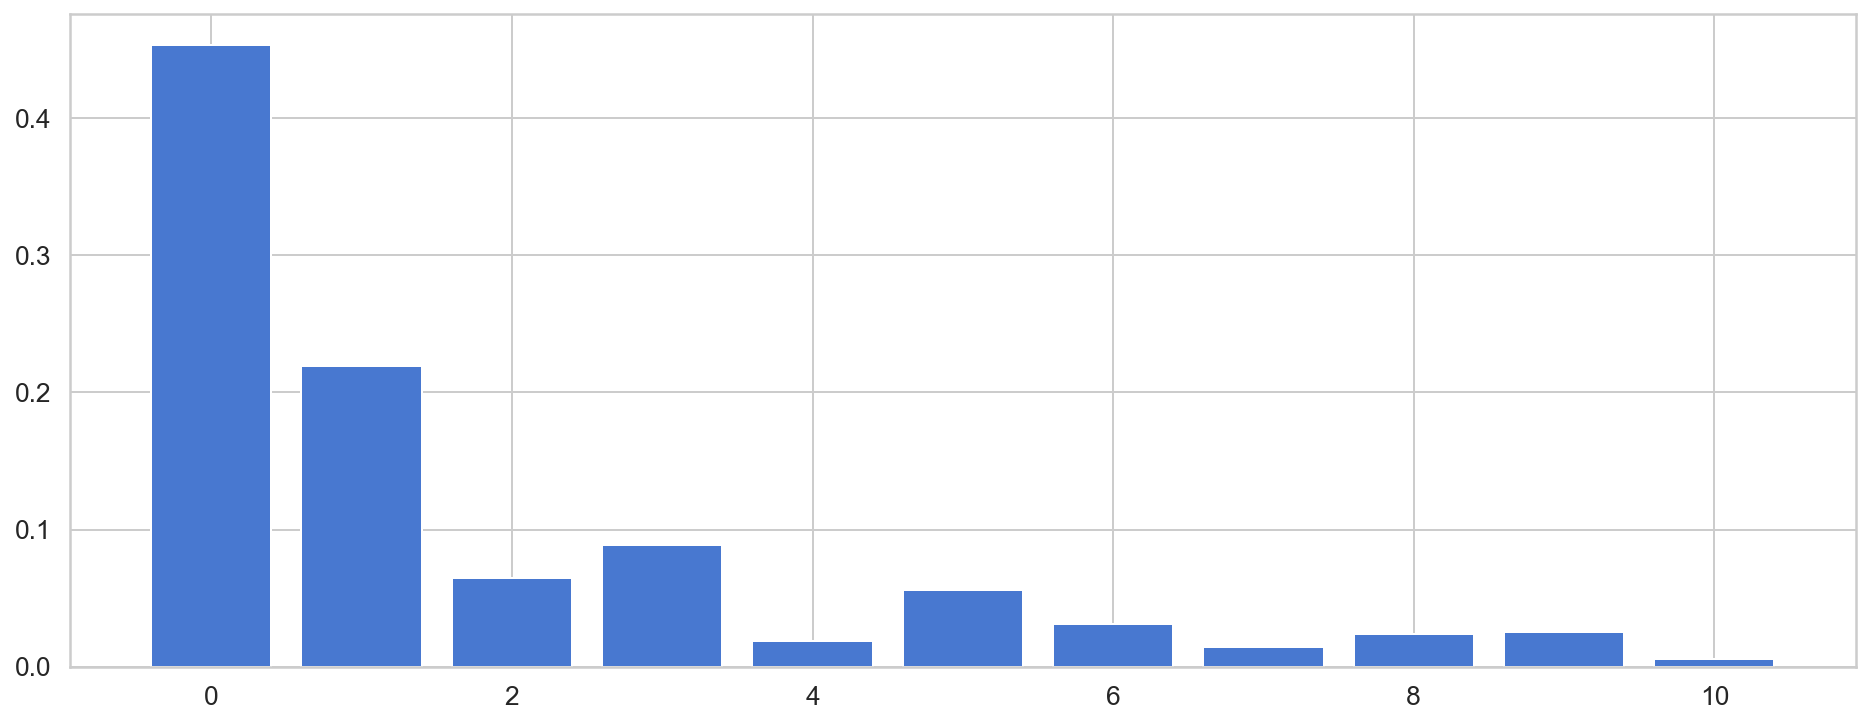

In [215]:
# get importance
importance = pipe['randomforestregressor'].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [216]:
important_features_dict = {}
for x,i in enumerate(pipe['randomforestregressor'].feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: %s' %important_features_list)

Most important features: [0, 1, 3, 2, 5, 6, 9, 8, 4, 7, 10]


In [219]:
for col, score in zip(X_train.columns, pipe['randomforestregressor'].feature_importances_):
    print(col,score)

Latitude 0.45328658723861387
Longitude 0.21931554043379947
HUC12_ 0.06485226167285933
Total Phosphorus MG/L 0.08842741631873542
Dissolved Oxygen MG/L 0.018868721770677704
Salinity Units in PPT 0.0560705839173304
PH corrected for TEMP (25 DEG C) SU 0.030921324825378127
Chlorophyll-A UG/L 0.014014206712333966
Water Temp DEG C 0.023583131967916955
Total Suspended Solids MG/L 0.025022104871802515
Turbidity NTU 0.005638120270552346


In [ ]:
#latitude
#longitude

#phosphorus
#huc12_

#salinity
#ph 